In [1]:
!pip install wordcloud

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import os
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

PATH = os.path.abspath(os.path.join(os.getcwd()))

In [4]:
database= os.path.join(PATH, "data.csv")
complete_database = pd.read_csv(database, na_values='')
#complete_database.columns = ['Source', 'ReviewDate', 'SKU_Seller', 'ReviewUser', 'ReviewRate', 'ReviewTitle','ReviewText']

In [34]:
# complete_database.rename(columns={'t2_all_fr_reviews.id_source': 'Source', 't2_all_fr_reviews.reviewdate': 'ReviewDate', 't2_all_fr_reviews.sku_seller': 'SKU_Seller', 't2_all_fr_reviews.reviewuser': 'ReviewUser', 't2_all_fr_reviews.reviewrate': 'ReviewRate', 't2_all_fr_reviews.reviewtitle': 'ReviewTitle','t2_all_fr_reviews.reviewtext': 'ReviewText' }, inplace=True)

In [5]:
complete_database.head()

,retailer_id,product_brand,review_title,author_id,review_date,mark,review_txt,product,product_id
0,AMAZON_fr,L'Oréal,Doux,amzn1.account.AGSGB5N3O3HPWKUIUMKEDDTAVM3A,2 décembre 2018,"5,0",Tres nkn schampoing,L'Oréal Professionnel - Shampooing Absolut Rep...,18165
1,AMAZON_fr,L'Oréal,PRODUIT,amzn1.account.AGXSHDAXG54ONTQJEDHYTDLIIATQ,15 août 2018,"5,0",TRÉS UTILES POUR LES PERSONNES CONCERNÉS.,L' Oréal Professionnel Shampooing Magnésium Si...,2525503
2,AMAZON_fr,L'Oréal,Produit efficace,amzn1.account.AFMKE3ZJZLMUM47XMJU4525YX5BQ,28 octobre 2017,"5,0",Le produit est efficace après trois applicatio...,L'Oréal Paris Progress Homme Gel de Repigmenta...,420337001
3,AMAZON_fr,L'Oréal,Un soin en salon accessible chez soi,amzn1.account.AEBR3NV7FW3YSG27SLGLWWJY72RA,14 octobre 2017,"5,0",Avec la gamme Absolut Repair de L'Oréal votre ...,L'Oréal Professionnel - Série Expert Absolut R...,NaN
4,AMAZON_fr,L'Oréal,Satisfaite,amzn1.account.AGF6AEXX3OA7JEG4EQOD2V74LC5Q,6 décembre 2016,"5,0",Application simple et rapide et laisse une bel...,L'Oréal Paris Infaillible Base de Maquillage P...,45269


## Read data from CSV file

In [8]:
k = 21
process = "Process2_b"
algorithm = "NMF"
doc_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "doc_topic_matrix.csv")
word_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "word_topic_matrix.csv")
    #dictionary_filepath = os.path.join(PATH, "data", "lda_output", "dictionary.csv")

In [9]:
doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
# dictionary = pd.read_csv(dictionary_filepath, encoding='utf-8')

In [10]:
word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

nb_topics = word_topic_matrix.shape[1] - 1
nb_documents = doc_topic_matrix.shape[0]

In [11]:
word_topic_matrix.head(10)

,term,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,7e,0.001093,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003098,0.000000,0.001270,0.00000
1,abandonner,0.006138,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000225,0.000021,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,abasourdi,0.000000,0.0,0.000000,0.000673,0.000000,0.004796,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,abim,0.001330,0.0,0.002058,0.002983,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.008536,0.000000,0.000000,0.000000,0.00517
4,abime,0.000000,0.0,0.000400,0.018961,0.000000,0.000000,0.0,0.000000,0.007684,...,0.0,0.000000,0.000000,0.0,0.000000,0.013375,0.000000,0.000000,0.008066,0.00000
5,abiment,0.000000,0.0,0.000000,0.000000,0.001084,0.000746,0.0,0.000000,0.000000,...,0.0,0.001350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001676,0.00000
6,abimer,0.000000,0.0,0.000000,0.085284,0.000000,0.001289,0.0,0.002834,0.000000,...,0.0,0.000000,0.000000,0.0,0.001600,0.000164,0.000000,0.002749,0.000000,0.02699
7,abimé,0.000000,0.0,0.000000,0.042815,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.006453,0.000000,0.000000,0.000000,0.000000,0.00000
8,abimée,0.000000,0.0,0.000000,0.014513,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,abitude,0.000000,0.0,0.000041,0.000000,0.000000,0.000349,0.0,0.001059,0.000143,...,0.0,0.000000,0.000000,0.0,0.000568,0.000257,0.000000,0.000044,0.000000,0.00000


In [12]:
doc_topic_matrix.head(10)

,documents,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,Tres nkn schampoing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,TRÉS UTILES POUR LES PERSONNES CONCERNÉS.,0.000167,0.000677,0.001024,0.000287,0.002652,0.000292,0.000463,0.000000,0.000017,...,0.001982,0.000122,0.000000,0.000709,0.000604,0.000810,0.000262,0.000000,0.000532,0.001674
2,Le produit est efficace après trois applicatio...,0.034667,0.036291,0.000157,0.026355,0.004132,0.000000,0.001153,0.001634,0.000808,...,0.000078,0.013048,0.001004,0.001523,0.001588,0.003110,0.000404,0.062084,0.023891,0.001042
3,Avec la gamme Absolut Repair de L'Oréal votre ...,0.000429,0.000000,0.000899,0.011148,0.001266,0.000392,0.000679,0.000061,0.000617,...,0.032136,0.004779,0.000340,0.002823,0.001556,0.000916,0.056392,0.002644,0.003689,0.002203
4,Application simple et rapide et laisse une bel...,0.000057,0.000000,0.001396,0.000000,0.002092,0.000486,0.000000,0.002643,0.001076,...,0.046229,0.046056,0.000000,0.001995,0.001891,0.070527,0.000000,0.001131,0.000369,0.000407
5,"Habitué des crèmes L'Oréal, je n'ai que été tr...",0.001598,0.000568,0.000347,0.001193,0.000000,0.000198,0.000556,0.000245,0.000000,...,0.000797,0.008988,0.001418,0.003842,0.001174,0.002530,0.005019,0.001059,0.003675,0.000252
6,"Ce modèle est particulièrement agréable, une c...",0.000515,0.000387,0.000000,0.008272,0.080613,0.000000,0.000000,0.003372,0.000000,...,0.011216,0.006300,0.005030,0.000297,0.000007,0.002387,0.000000,0.004352,0.000000,0.002515
7,Son odeur est très agréable (plus que la plupa...,0.000000,0.000000,0.000000,0.002664,0.086679,0.000000,0.000000,0.000000,0.000123,...,0.000000,0.086468,0.000159,0.002667,0.002363,0.000000,0.116494,0.001730,0.005590,0.001511
8,Elle pourra laisser un léger film gras si on e...,0.000370,0.000386,0.000193,0.005627,0.004668,0.000000,0.005386,0.000000,0.002327,...,0.006725,0.002141,0.000000,0.000000,0.000458,0.000912,0.009771,0.000047,0.000236,0.001178
9,"Ensuite son effet anti-âge, on va considérer ç...",0.000000,0.000343,0.000276,0.000000,0.000904,0.000000,0.000000,0.000000,0.000000,...,0.011301,0.042440,0.000000,0.000137,0.001463,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# # feature_names = dictionary
# feature_names = (["7e","aa","ab","abaisser","aband","abandon","abandonner","abaque","abatage","abattage","abattre","abattu","abeille","aberration","aberrer","abimd","abime","abiment","abimer","abimera","abimeront","abimé","abimée","abimées","abimés","abitué","abondamment","abondance","abondant","abondemment","abonnement","abonner","abord","abordable","aborder","abors","about","aboutir","aboutés","abranet","abrasif","abrasion","abri","abriter","abrupt","abrutir","abs","absence","absent","absenter","absolu","absolumentje","absorbant","absorber","absorbeur","absorption","abstenir","abstraction","absurde","abus","abuser","abusif","abustres","abîmer","ac","acabit","acacia","acaht","acajou","accager","accasion","acceder","accelerateur","acceleration","accelerer","accentuer","acceptable","acceptation","accepter","acces","accesible","accesoire","accesoires","accessibilité","accessible","accessoir","accessoire","accessoirement","accessoiresefficace","accessoiresje","accessoiriser","accessorisation","acceuillir","accident","accidentel","accidentellement","accidenter","accommoder","accompagnants","accompagner","accomplir","accomplirassez","accord","accorder","accoueavec","accoues","accoup","accouplement","accoupler","accoups","accro","accroc","accrochage","accrocher","accrocheur","accroite","accroupir","accroître","accru","accu","accueil","accueillir","accumulateur","accumulation","accumuler","accusen","accuser","accès","accéder","accélèrateur","accélérateur","accélération","accélérer","accés","accéssoires","acepter","acetone","ach","achalandé","acharnement","acharner","achat","achata","achatbosch","achatce","achatelle","achater","achatet","achatfacile","achatje","achatla","achatle","achatsinon","achatune","achatvraiment","achatà","acheminement","acheminer","achet","achete","achetee","acheter","acheterai","acheterais","acheterpour","achetersika","achetes","acheteur","acheteurmatériel","achetter","achetè","achetégamme","achetémarque","achever","achheté","achille","achter","achéte","achété","acide","acier","aconvénient","acoustique","acoustix","acquerir","acquis","acquisition","acquitter","acquéreur","acquérir","acquérire","acrobatique","acrylique","acte","acteur","actif","action","actionnable","actionnement","actionner","activable","activation","activement","activer","activite","activité","actualité","actuel","actuellement","acu","acétone","ad","adapateur","adaptabilité","adaptable","adaptablesnouvelle","adaptableévidement","adaptateur","adaptation","adaptative","adaptee","adaptegamme","adaptentgamme","adapter","adapterbosch","adapterbricolage","adapteur","adaption","adar","additif","addition","additionnel","additionner","ade","adepte","adequat","adequate","adequately","adequats","adesif","adherant","adhere","adherence","adhesif","adhérenc","adhérence","adhérent","adhérer","adhésif","adhésion","adieu","adirondack","adjacent","adjoindre","adjonction","admettre","admirablement","admirer","admis","admissible","ado","adopter","adore","adorer","ados","adoucir","adresser","adulte","advance","advanced","advancedimpact","adventice","adéquat","adéquation","ae","aeg","aerations","af","affaiblir","affaiblissement","affairepar","affairer","affaireà","affaisser","affecter","affectionner","affichage","afficher","afficheur","affiler","affilier","affilé","affiner","affirmer","affleurer","affleureuse","affoler","affouage","affranchir","affreusement","affreux","affronter","affubler","affutage","affutages","affute","affuter","affuteuse","affuté","affutée","affutées","affutéesbonne","affût","affûtage","affûtages","affûter","affûteur","affûteuse","after","agacer","against","agaçant","age","agencement","agencer","agenouiller","agent","agglo","agglomere","agglomération","agglomérer","agglos","agglutiner","aggraver","aggripant","agile","agilite","agilité","agir","agissement","agiter","aglo","agrafer","agrafeuse","agrandir","agrandissement","agreable","agreablement","agresser","agressif","agression","agressivité","agriculteur","agrippante","agrippantes","agripper","agronomiquement","agrume","agréable","agréablea","agréablement","agréer","agrément","aguerrir","agéable","agée","agées","ahah","ahh","ahon","ahoutil","ahs","ahurir","ai","aidemerci","aider","aiderce","aigu","aiguiller","aiguisage","aiguiser","aile","ailette","aillant","ailleur","ailleurs","ailleurscabane","ailleurset","ailleursle","aimabie","aimable","aimablement","aimant","aimantation","aimanter","aimeavis","aimefiables","aimer","ain","aipar","air","airait","aire","ais","aisance","aise","aisee","aisement","aisonnable","aisselle","aisé","aisée","aiséemais","aisément","aisétrès","aiuto","aix","aiz","ajout","ajouter","ajustable","ajustage","ajustement","ajuster","ajusteur","ake","akku","aktivator","al","alain","alaise","alarmer","alb","albert","alcali","alcool","aldi","alen","alentour","alerter","aletellier","alexandre","alexis","algicide","algue","aligator","alignement","aligner","alim","alimamazon","aliment","alimentaire","alimentation","alimenter","alister","aliter","all","allan","allee","allees","alleesle","allemagne","allemand","allemandce","allemandecommerce","allemandle","allen","allentour","aller","allergie","allergique","alliage","allier","alligator","allister","allongement","allonger","allumage","allumagedevoir","allumer","allumette","allure","allèearbuste","allègrement","alléchant","allécher","alléger","alor","alourdir","already","als","also","alternance","alternatif","alternative","alterner","altitude","altérer","altérité","alu","aluminium","alvéolé","aléa","aléatoire","aléatoirement","alésage","alésages","am","amabilité","amais","amalgamer","amande","amas","amateur","amateuravec","amazob","amazon","amazone","amazongarantie","amazonie","amazonmerci","amballage","ambiance","ambiant","ambiguité","ambitieux","ambition","ambivalence","ambouts","ambulant","ame","amelioration","ameliorations","ameliorer","amener","amer","amerique","ameublement","ameublir","ami","amin","amincir","ammoniac","ammonium","amoindrir","amont","amorcage","amorcer","amortir","amortissement","amortisseur","amorçage","amoureux","amovible","amp","amperage","ampere","amperes","ample","amplement","ampleur","amplitude","ampoule","ampère","ampérage","amusant","amuser","amw","amzazon","amélioration","améliorer","aménagement","aménager","américain","amérique","an","analogue","analyser","anbref","anche","anchorfix","ancieins","ancien","ancienavec","ancrage","ancrer","ancêtre","and","android","andré","andurant","anecdote","anecdotique","ange","anglais","angle","angler","angleterre","anglicisme","anglo","angoisser","angulaire","anicroche","animal","animer","ankyloséeslà","anne","anneau","annee","annees","annexer","annicroche","anniversaire","annoncee","annoncer","annoncéje","annuel","annulation","annuler","année","annéesje","anodin","anodiser","anomalie","anonce","anonyme","anormal","anormalement","ans","anse","anset","ansà","ant","antan","antenne","anthracite","anti","antiblocage","antibruit","anticipation","anticiper","antidérapant","antimousse","antipode","antique","antiquité","antirouille","antérieur","anvant","any","anyone","aout","août","apareil","apart","apartement","apercevoir","apermis","aperçu","aplanir","aplatir","aplomb","apoint","apparait","apparaitre","apparament","apparaître","appareil","appareilautoselect","appareilefficace","appareilil","appareilje","appareillage","appareiller","appareilpeu","apparement","apparemment","apparence","apparent","apparenter","appariel","apparition","appart","appartement","appartenir","apparémment","appel","appeler","appellation","appeller","appendice","appentis","appercoit","apple","appli","applicable","applicateur","applicateurs","application","applicationgros","applicationtransparent","appliquer","applucation","appoint","apport","apportantle","apporter","apposer","appreciable","apprecie","apprecier","apprecié","apprendre","apprentissage","appret","apprivoiser","approcher","approfondir","appropriee","approprier","approuver","approvisionnement","approvisionner","approximatif","appréciable","appréciableopérationnel","appréciabletrès","appréciation","apprécier","appréhender","appréhension","apprêter","appui","appuye","appuyer","apr","aprem","apresmais","aprt","aprèset","apréciable","apte","apuier","apès","apéro","aquarium","aquatique","aqueux","ar","araignée","araldite","araser","arborer","arbre","arbtre","arbuste","arbustesainsi","arbustesmais","arbustifs","arbustres","arc","arceau","archaïque","arche","archi","architecte","architecturée","arcy","ardoise","ardu","are","argement","argent","argentdonnés","argenter","argile","argileux","argument","argumenter","ariver","armature","armer","armeret","armoire","arnaquer","arnaqueur","aromate","around","arrachage","arrachement","arracher","arrangement","arranger","arret","arrete","arretent","arreter","arreté","arretée","arriere","arrieres","arriive","arrimer","arrivage","arrive","arrived","arrivee","arriver","arriérer","arrondir","arrosage","arroser","arroseur","arrvé","arrète","arrété","arrétée","arrêt","arrêter","arrêteune","arrêtiers","arsenal","arsène","art","arthrose","arthure","article","articleje","articlemerci","articulaire","articulation","articuler","artifice","artificiel","artillerie","artisan","artisanal","artisant","arête","asb","asc","ascension","ascensionnel","asez","asiatique","asie","asin","asipration","aspect","aspen","asperger","asphalter","aspi","aspirant","aspirateur","aspirateursouffleur","aspirateurà","aspiration","aspirationle","aspirationmais","aspirationon","aspirer","aspirerproduit","aspiretrès","aspiro","aspiréecependant","aspérité","assagiesentretien","assainir","assaisonner","assaut","asse","assecoire","assecoires","assemblage","assembler","assenblés","asseoir","asser","asservir","asses","assidu","assiette","assimiler","assis","assistance","assistant","assister","association","associer","assortiment","assortir","assouplir","assourdir","assumer","assurance","assuree","assurer","assurément","assèchement","assé","assécher","asthmatique","astronomique","astuce","astucieusement","astucieux","asymétrique","asynchrone","atelier",
#   "atent","athlète","aticle","atisfait","atmosphère","atmosphérique","atone","atout","att","attachement","attacher","attaquable","attaquer","attarder","atteindre","atteindredes","atteint","atteinte","attelage","atteler","attenant","attendaisje","attendbosch","attendre","attends","attendscordialement","attendu","attendudifficulté","attendurien","attent","attentedeux","attenteil","attenteje","attentemarquants","attenter","attentes","attentesbelle","attentesje","attentesléger","attentesprix","attentif","attention","attentiondéceptions","attentivement","attentte","attenu","atterrir","attidute","attirail","attirer","attitude","attractif","attraper","attrapper","attrayant","attribuer","attribut","atténuer","atx","au","auaparavant","aubaine","aubépine","auchan","aucun","aucunement","auditif","augmentation","augmenter","augurer","aujourde","aujourdui","aune","auparavant","auprès","auprés","aurbustes","auriculaire","auréoler","aussi","aussiil","aussije","aussinon","aussitot","aussitôt","aut","autan","autant","autantryobi","authenticité","authentiquer","auto","autoblocant","autobloquant","autobloquants","autoclave","autoclic","autocollant","autocut","autoforante","autolissant","automatique","automatiquee","automatiquement","automie","automique","automne","automobile","autonome","autonomi","autonomie","autonomieen","autonomiefinition","autonomieje","autonomiemais","autonomieplus","autonomy","autoportee","autoporté","autorisation","autoriser","autorité","autoselect","autosense","autoserante","autoserrant","autoserreur","autotracté","autotractée","autour","autrece","autremaintenant","autreselle","autresmoi","auxiliaire","av","avai","avaler","avancait","avancement","avancer","avant","avantager","avantageusement","avantageux","avantageuxce","avantutilisation","avarier","avc","avce","ave","avec","avecc","avecnettoyage","avecpas","avecr","avenir","avent","aventageux","aventurer","avenu","avere","averer","avertir","avertissement","avertitil","aveuglement","aveugler","avignon","avion","avis","aviser","aviver","avnt","avo","avoir","avoiraucune","avoisiner","avonsce","avouer","avril","avt","avvitare","avz","avèrait","avérer","axer","axial","axt","axton","aération","aérer","aérien","aérosol","aîné","aïe","aïeul","ba","baba","babans","bac","bache","back","bactérie","bag","bague","baguer","baguette","baignoire","bain","baina","bainet","bainje","baisser","balader","baladeur","balai","balaise","balancement","balancer","balante","balançoire","balayage","balayer","balayette","balck","balcon","ball","ballade","balladent","balle","ballon","ballote","balsa","balustrade","bambou","bambouseraie","banal","banane","banc","bancaire","bancal","bancher","banches","banché","bandeau","bandeen","bandej","bander","banderole","bandoulière","bang","banner","bannir","banqueter","baptiser","bar","baraque","baratin","baratze","barbecue","barber","barbotine","barbouiller","bardage","bardahl","baril","barillet","barreau","barrer","barrette","barriere","barrière","bas","basculant","basculement","basculer","basela","baser","bash","basic","basique","basket","basse","bassement","bassin","bassiner","bastain","bastaing","bastaings","batailler","bateau","bateria","baterie","bateries","baterrie","bati","batiment","batrie","batt","batteire","batterie","batteriecar","batteriece","batteriede","batterieet","batterieje","batteriele","batteriemais","batteriemanque","batterieme","batteriene","batterieont","batterieoutil","batterierecommandons","batterieretour","batteries","batteriesamazon","batterieschargeur","batteriesi","batteriesje","batteriesla","batteriesles","batteriesune","batterieune","batterir","battermes","batterrie","battery","batterye","battre","battrie","baucoup","baudrier","bavarois","baver","bavette","bavure","bayer","bayonne","bazar","baïonnette","bbon","bbq","bcp","bd","be","beacoup","beau","beaucoupplus","beaucoups","beautul","beauté","bec","becane","becanne","because","been","beeper","beige","being","belge","belgique","belle","bemol","bemole","ben","benne","berceau","berger","berlingo","berlingot","berner","besoin","besoinen","best","bestiole","bet","bete","betise","beton","better","betterie","beurrele","beurrer","bi","biai","biais","biaiser","bibliotheque","bibliothèque","bic","bicarbonate","biceps","bicher","bidon","bidouiller","bidouilleurs","bidule","bie","bielette","bielle","biellette","bien","bienacheté","bienarrivé","bienbatterie","bienbeaucoup","bienbon","biencela","biencontent","bienelle","bienen","bienet","bienfacile","bienhélas","bienje","bienla","bienlame","bienlégère","bienmais","bienmettre","bienon","bienpar","bienpas","bienpeu","bienproduit","biensur","biensûr","bientot","bientout","bientrès","bientôt","bienun","bienune","bienvenu","bienvenue","bier","bietmarque","big","biguot","bijou","bilan","bille","billet","billot","bim","bin","binaire","biner","bineuse","bingo","bio","biodegradé","bip","biroute","biscornu","biscuit","biseau","biser","bisou","bit","bitoniau","bitume","bitumer","bitumeux","bitumineux","bizarement","bizarre","bizarrement","bizarrerie","bière","bjr","bl","bla","blabla","blablabla","blache","black","blackseal","blade","blaguer","blanc","blanche","blancheappliquer","blancheur","blanchir","blanchâtre","blanco","bleffant","blesser","blessure","bleu","bleufé","bleugrande","blinder","blister","bloc","blocage","blocant","blochet","block","blog","bloquage","bloquantes","bloquants","bloquer","bloqueur","blouson","bluetooth","blufee","bluffante","bluffantes","bluffants","bluffer","bmw","bnul","bo","bob","bobinage","bobiner","bobo","bocagère","boch","boche","bochs","bocsh","boff","bogue","bohneur","boiboite","boire","bois","boisaucun","boiser","boiserie","boisfixer","boisje","boismortier","boisson","boiter","boitier","boitiers","boitié","boitte","bol","bolils","bom","bomber","bombonne","bon","bonbonne","bond","bonde","bone","bonen","bonheur","bonheurje","bonheurniveau","bonheurpas","bonje","bonjour","bonjouracheter","bonjouracheté","bonjourbricoleur","bonjource","bonjourdommage","bonjourj","bonjourje","bonjourla","bonjourle","bonjourmerci","bonjournikel","bonjouroui","bonjoursuper","bonjourune","bonjourvoici","bonn","bonne","bonnele","bonnement","bonnevous","bonrien","bonsamélioration","bonsconditions","bonsfiables","bonsoir","bonsqualité","bonsuper","bonsétanchéité","bonton","bonus","bonzaii","boost","booste","booster","bord","bordeaux","border","bordereau","bordure","borduresatisfait","borf","borner","borniers","borure","bosch","boschbelle","boschce","boschcelui","boschces","boschfiabilite","boschje","boschla","boschli","boschmais","boschpour","boschque","boschtrès","boschun","bosh","bosquet","boss","bossage","bosseler","bosser","bostik","botter","bottin","bou","bouchage","boucher","bouchon","bouchonner","boucler","boudin","boue","bouffer","bougele","bouger","bought","bougie","bouigescordialement","bouillant","bouillir","bouleau","bouler","boulette","bouley","boulo","boulon","bouloneuse","boulonner","boulonnerie","boulonneuse","boulot","bouquet","bourage","bourdonner","bourer","bourrage","bourrelet","bourrer","bourrin","bourse","bousculer","bousiller","bousin","bout","bouteille","boutique","bouton","box","boxer","boxx","boìte","boîte","boîtier","brai","braiser","brancard","branchage","branchement","brancher","brancherou","branchette","branlant","branler","branloque","braquage","bras","brasce","brasje","brasser","bravomatériel","break","bref","brefje","brefmachine","breftres","bretagne","bretelle","breton","brevet","breveter","brf","brico","bricocage","bricolage","bricolagecar","bricolagemais","bricolageplutôt","bricolagetout","bricolagetrès","bricoler","bricolerjours","bricolermais","bricoleur","bricoleurbon","bricoleuret","bricoleursautant","bricoleurset","bricolo","bricoman","bricomarche","bricomarché","bricorama","bricos","brider","bridge","bridilles","brigg","briggs","brillance","brillanter","briller","brin","brindille","brindillesglands","brio","brique","briquer","briquette","bris","briser","britannique","brive","brocher","brochure","bron","broncher","bronchiole","brossage","brosseje","brosser","brouette","brouillard","broussaille","broussailleux","brouter","broutille","broyage","broyat","broye","broyer","broyersinon","broyeur","broyeurgain","broyeurle","broyeurune","brr","bruiant","bruillant","bruillante","bruiner","bruire","bruit","bruitce","bruiter","bruitgamme","bruitil","bruitseul","brulante","brule","bruler","brulé","brulées","brumer","brumisateur","brun","bruno","bruschless","brush","brushless","brusless","brusquement","brusquer","brut","brutal","brutalement","brutaliser","brute","bruyance","bruyant","bruyantadapté","bruyantaspiration","bruyantebref","bruyantede","bruyaunt","bruyère","brèche","brèf","brûler","brûlure","brûmiser","bs","bt","btp","btr","buanderie","buche","bucher","bucheron","bucheronnage","bucherons","buches","buchettes","buck","budget","buena","buffet","bug","bui","buis","buisson","buller","bundle","buno","bureau","burette","burin","burinage","burinages","buriner","burineur","burineurs","burineuse","buse","bushes","but","butee","buter","butoir","butter","butyle","buy","by","bâche","bâcher","bâcler","bât","bâteau","bâterie","bâtiment","bâtimentpour","bâtir","bâton","bâtonnet","bé","bébé","bébête","bécane","béhant","bémol","bémole","bémolla","bémolle","bénédiction","bénéfice","bénéficier","bénéfique","béquille","béton","bétonen","bétonmais","bétonner","bétonnière","bêcher","bête","bêtement","bêtise","bêton","bûcher","bûcheron","bûcheronnage","bœuf","ca","cabane","cabanon","cabanonje","cabine","cablage","cable","cables","cabossage","cabosser","cabosservraiment","cabrer","cacher","cachet","cacheter","cad","caddy","cadeau","cadenas","cadence","cadencer","cadmium","cadmiun","cadran","cadrer","caduque","cafeau","café","cage","cagnotte","cahier","cahrge","cailler","caillou","caillous","caillouteux","caisse","caissier","caisson","cal","calage","calages","calamiteux","calcaire","calcul","calculer","calendrier","caler","calette","calfeutrement","calfeutrer","calibrage","calibrer","calicot","calite","caller","callé","calmer","calorie","calvaire","cam","cambriolage","came","camelote","camer","camion","camionnette","camouflage","camoufler","camp","campagne","camping","camélia","caméra","can","canadien","canal","canalisation","canaliser","canapé","canelés","caner","canneler","cannelure","canner","canon","cantonner","canule","caorde","caoutchou","caoutchouc","caoutchouter","caoutchouteux","cap","capable","capacite","capacites","capacitese","capacité","capillaire","capillarité","capital","capot","capotage","capricieux","capsule","capter","capteur","captif","capturer","capuchon","caquelons","car","cara","caracteristiques","caractère","caractériser","caractéristique","caramel","caravane","carbone","carbonés","carbu","carburant","carburateur","carburation","carburer","carcasse","cardan","caresser","carla","carles","carnage","carnet","carole","carottage","carotter","carpien","carreau","carrefour","carrelage","carreler","carreleur","carrement","carrer","carrière","carrosserie","carrossier","carrécerise","carrément","carte","carter","carton","cartonc","cartonnage","cartonner","cartouche","cartport","carénage","cas","cascadeur","casdonc","caser","casgamme","cashback","casiment","casquer","casquette","cassant","cassee","casser","casserole","cassessauf","cassette","cassure","casséeje","casséerevoie","cast","casto","castoche","castor","castorama","castoramaje","castos","castoto","caséquivalents","cat","cata","cataloguer","catalyseur","catastrophe","catastrophique","categorie","catégorie","catégoriehabitude","catégorietrès","caucase","cauchemar","causer","causeà","causto","caution","cavalier","caver","cavité","cb","cc","cd","cde","cder","cdes","cdiscount","cdiscountje","cdld","cdlt","cdt","cede","ceinturer","ceinturon","cejour","cel","celer","cellier","cellophane","cellulaire","cellule","celui","celà","cen","cendrer","censurer","censé","cent","centaine","centenaire","centime","centimetre","centimètre","centrage","central","centrale","centralebrico","centralisation","centraliser","centrer","centreur","cependantêtre","cerclage","cercler","cerise","cerisier","cerner","cert","certainement","certains","certe","certeset","certfiier","certificat","certifier","certitude","cervical","cesser","cest","cet","cetait","cete","cexiste","cf","ch","chage","chagriner","chaine","chaines","chainetrès","chainevraiment","chaise","chalet","chaleur","chaleuraux","chaleureusement","challenge","chalumeau","chambranle","chambrer","champ","champignon","champêtre","chance","chandelle","chanfreiner","changeable","changeables","changee","changemarque","changemen","changement","changer","chant","chantier","chantierni","chantournage","chantourner","chaotique","chape","chapeau","chapitrer","chappe","chaques","char","charbon","charche","chardon","charge","chargebon","chargees","chargeet","chargegénial","chargeje","chargement","charger","chargerla","chargetrès","chargeur","chargeurbatterie","chargeurtrès","chargeurvraiment","chariot","charmant","charmer","charmille","charnière","charniéres","charpenter","charpentier","charrette","charriot","charrue","charte","chartres","chasser","chassis","chat","chatière","chaud","chaudement","chaudementvous","chaudière","chaudièreset","chaudronnerie","chauffage","chauffagelégèrela","chauffant","chauffer","chauffeur","chaume","chausser","chaussette","chaussure","chaux","chaînecelle","chaîneen","chaîner","chaînon","cheap","chef","chemin","chemincalcaire","cheminement","cheminer","chemise","chenal","chene","cheque","chercher","chere","cheren","cheres","cheretc","cheri","chermais","cherun","cheval","chevalet","chevaucher","chevet","cheveu","chevillages","cheville","chevron","chevronne","chevronner","chewing","chichi","chien","chiendent","chiente","chier","chiffon","chiffonner","chiffrer","chignole","chimie","chimique","chimiquement","chimiste","chiner","chinois","chinoiserie","chip","chipoter","chipoteur","chips","chlore","chlorhydrique","chloroprène","chloré","choc","chocdonc","choir","choisir","choix","choixles","choquer","chose","chouette","chouilla","chris","christ","christinel","christophe","chromer","chroniquer","chrono","chronopost","chuter","châssis","châtaigne","châtaignier","château","châtelain","chène","chèque","chèr","chèrefiable","chèrelame","chèvre","chéne","chéneau","chére","chérir","chêne","chêneau","chêneschâtaigniersdont","ci","cibler","ciculaire","ciel","cigare","cigarette","cile","cillaille","cime","ciment","cimenter","cimenterie","cimetière","cingalais","cintrer","cinéma","cinétique","circlips","circonférence","circonstance","circuit","circulaire","circuler","cirer","cisaillement","cisailler","ciseau","ciseauxnotamment","citadin","citer","citron","ciupe","civiliser","clack","clair","claire","clairement","clamp","claper","clapet","claquement","claquer","clarifier","clarté","class","classecatégories","classement","classer","classic","classique","classiqueil","classiquement","claude","clavette","clavier","cle","clean","cleaner","clef","click","client","clientscesse","clientèle","clignotant","clignotement","clignoter","clikfit","clim","climat","climatique","climatiseur","clin","clio","clip","clippe","clipper","clipsable","clipsage","clipse","clipsent","clipser","clipssage","clipsé","clipsée","cliquage","clique","cliquer","cliquet","cllc","clocher","cloison","cloisonnement","cloque","cloquer","clore","cloture","clou","clouage","clouer","cloueur","club","clè","clé","clée","clément","clôturer","cm","cmlivrée","cmmoteur","cms","co","coast","cocher","cochon","cochonnerie","codage","coder","coeur","coffet","coffrage","coffrer","coffret","coffretje","cofret","cogex","cogner","cohérence","cohérent","cohésion","coiffer","coiffeur","coiffure","coin","coincait","coincer","coins","col","coler","coli","colis","colisage","colissimo","colisvoir","colisé","collaborateur","collafeu","collage","collant","colle","collecolle","collecter","collecteur","collectif","collection","colleon","coller","collerette","collesèche","collet","collfeu","collier","colline","collision","collègue","colmatage","colmatagehuile","colmater","colmatpro","colomiers","colomousse","colonne","coloration","coloree","colorer","coloris","colossal","colson","coltiner","colza","colère","com","comande","combattre","combi","combinaison","combiner","combitrim","combler","comblet","combo","combustion","come","comender","coment","comentaires","comforme","comfort","comfortable","comfy","command","commandee","commandeen","commandeil","commandeque","commander","commandereçu","commandetien","commantaire","commantaires","commencer","commende","commendee","commendemerci","commender","commentaire","commentairepas","commentairesi","commentaireséquipés","commentateur","commenter","commenteravis","commenterbel","commenterje","commercants","commerceje","commercer","commercial","commercialement","commercialisation","commercialiser","commerçant","commettre","commode","commodepassage","commodité","commodo","commun","communauté","commune","communebosch","communicant","communication","communiquer","commutateur","commutation","compacité","compact","compactable","compactage","compactelégère","compacter","compagnie","compagnon","comparabilité","comparaison","comparatif","comparativement","comparer","compartiment","compartimentage","compartimenter","comparéconcurrents","comparéegamme","compas","compatbile","compatibilite","compatibilité","compatibiltié","compatible","compatiblebosch","compatibledewalt","compatiblemarque","compatiple","compenser","competant","competent","competitif","complement","complet","complete","completement","completer","complexer","complexité","complication","compliment","complimenter","compliquer","compliquémais","complètement","complèterais","complément","complémentaire","complémentairesqualité","complémentarité","complémentement","complémentèrent","compléte","complétement","compléter","comportebatterie","comportement","comporter","composant","composer","composite","composition","compost","compostable","compostage","composter","composteur","compra","comprato","comprehensible","comprehension","comprendre","compresser","compresseur","compression","compriband","comprimer","compris","compromettre","compréhensible","compréhensif","compréhension","comptabile","compter","compteur","compétence","compétent","compéter","compétitif","compétitifcar","compétition","con","concave","conceiller","concentration","concentrer","concentrique","concentrésaromatiques","concept","concepteur","conception","concernemac","concerner","concession","concessionnaire","concevoir","concluant","conclure","conclusion","conclusionce","conclusionsi","concorder","concrete","concrètement","concrétion","concrétiser","concu","concue","concues","concurence","concurent","concurente","concurents","concurrenceet","concurrencer","concurrent","concurrentiel","concéquant","condensateur","condensation","condescendant","condition","conditionnecorrecte","conditionnement","conditionnementmakita","conditionner","conducteur","conduire","conduit","confection","confectionner","confetti","confiance","confianceorigine","confiancesika","confiant","confidentiel","confier","configuration","configuréebosch","confiner","confirmation","confirmer","confirmécroit","conflit","confo","confondre","conforama","conform","conformeau","conformer","conformite","conformité","conformément","confort","confortable","confortablement","conforter","confronter","confrère","confus","confusion","confusément","conférer","congé","congélateur","conifère","conifèressemble","conique","conjoindre","connaissai","connaissance","connaissantdette","connaissantportatifs","connaisseur","connait","connaitre","connaître","connecter","connecteur","connecteurs","connection","connectique","connectiques","connerie","connexion","connu","connuetrès","conquis","conquérir","conrad","conrrespond","consacrer","conscience","consciencieusement","consciencieux","conscient","conseil","conseillee","conseillen","conseiller","conseillerbatterie","conseilleur","conseillè","consequent","consequente","conservable","conservation","conserver","considérable","considérablement","considérale","considération","considérer","consigner","consistance","consistant","consister","conso","consoeur","consolation","consoler","consolider","consomable","consomation","consommable","consommateur","consommation","consommer","consort","constament","constamment","constance","constant","constat","constatation","constater","consterner","constituer","constitution","constructeur","construction","construire","consultation","consulter","consécutif","consécutivement","conséquence","conséquent","consœur","contact","contacter","contacteur","contacteurs","contaminer","contantpar","contenance","conteneur","contenir","content","contenter","contentrien","contenu","conter","contestable","contestation","contester","contexte","continu","continuamente","continuation","continuellement","continuer","continuité","contorsion","contorsionner","contour","contourner","contractuel","contradiction","contraignant","contraindre","contraint","contrainte","contraire","contrairement","contrairementdispose","contrarier","contrario","contrariété","contraster","contrat","contre","contrecollé","contredire","contrefaçon","contreil","contreje","contremarche","contremême","contrepartie","contreplaqué","contreplqque","contrepoids","contrer","contretemps","contribuer","contribution","control","controle","controler","contrôlable","contrôlableça","contrôler","contrôleur","convaicu","convaincant","convaincre","convaincu","convenable","convenablebon","convenablement","convenance","convenir","conventionnel","convenu","conversion","convertir","convertisseur","conviction","convien","convier","convoitise","conçu","conçulame","conçule","conçumoteur","cool","coolie","cools","cooncées","coordonner","copain","copal","copaux","copeau","copeauxlivré","copier","copieusement","copropriété","coque","coquet","coquille","cordelette","cordelier","corder","cordialement","cordon","corect","corecte","corespond","coriace","corniche","cornière","cornouiller","corollaire","corp","corps","corpulence","correct","correctement","correcteur","correctfacile","correction","correctles","correctmais","correctment","correctpratiqueesthétiquebien","correspondance","correspondant","correspondre","corriger","corroder","corrosif","corrosifmais","corrosion","corrsepond","corser","corvée","corêtes","cosmetiques","cosser","cost","costal","costaud","costaudun","costeau","costo","costumer","cosy","cotebrico","coter","coton","cotonaester","cotoneaster","cotécoupe","cou","couac","coucher","coucou","coude","coudeau","coudeinventé","couder","coudre","coudés","coue","couille","coulage","could","couler","couleur","coulis","coulissage","coulissant","coulissanteen","coulissement","coulisser","couloir","coulure","coup","coupable","coupant","coupe","coupeassez","coupebon","coupece","coupeet","coupele","coupelle","couper","coupetres","coupeun","coupeur","coupgenre","couplage","coupleles","coupler","couplet","coupleuse","coupleux","coupseul","coupure","cour","courage","courageux","couramment","courant","courante","courbaturer","courber","courbevibrations","courbure","coureur","courir","couroi","couronner","courrant","courrier","courrierat","courroie","course","courser","coursive","court","courter","courtois","courtoisement","courtoisie","cousin","coussin","coussinet","cousu","cout","coutait","coute","couteau","coutent","couter","coutera","couterait","couteux","couts","coutume","coutumier","couture","couturier","couté","couvercle","couverture","couvrance","couvreur","couvrir","cov","coût","coûter","coûteux","cp","cps","cr","crabots","cracher","craindre","crainte","cramer","crampe","crampon","cran","cranter","crantée","craqueler","craquelure","craquement","craquer","craquèle","crasse","cratère","crayon","crdlt","cream","credence","creer","crepi","crepis","crescendo","creuser","creux","crevasser","crever","crew","cri","crier","crise","crisper","crisser","cristal","cristalliser","critiquer","critère","crocher","crochet","croire","croiser","croisillon","croissance","croix","croquer","croquis","crosse","croyable","croûter","cru","cruci","cruciforme","cruel","cruellement","cruiser","crussiforme","crème","créateur","créatif","création","créativité","crédence","crédit","créditer","créer","crémaillère","créneau","crépine","crépir","crépon","cstb","cte","cual","cuber","cueillir","cuillère","cuir","cuire","cuisineet","cuisiner","cuisinier","cuisiniste","cuisinistes","cuisse","cuisson","cuit","cuivrer","cul","culasse","culloch","cullock","cullog","culoch","culot","cumaru","cumuler","cupressus","curatif","curer","curieusement","curieux","curiosité","curseur","customisable","cut","cutané","cuter","cuteur","cuts","cutter","cutteur","cutwood","cuver","cuvette","cv","cyano","cyber","cycle","cyclonique","cygne","cylindrede","cylindrer","cylindrique","cylindrée","cypres","cyprès","cyrille","cà","càble","câbler","câler","cèdre","céder","célébrer","céramique","césar","cône","côte","côtoyer","côtès","côté","cœur","cœurs","dab","daccus","dacheter","daigner","dailleur","dailleurs","dair","dakar","dalep","dallage","dalle","daller","damer","damu","dan","danger","dangereux","dangerosité","daniel","dannées","danser","dansle","dant","dataitaprès","dater","dauber","dautre","davantage","davidson","day","db","dc","dcd","dd","ddf","de","deadline","deal","deballage","debarasser","debit","debiter","debité","debloquer","debonix","debramche","debrancher","debranché","debrayage","debrouiissailleuse","debrouiller","debrouissailler","debrousailer","debrousailleur","debrousailleuse","debroussailler","debroussailleur","debroussailleuse","debut","debutant","debutants","debute","decale","decalé","decape","decapeur","decembre","deception","decevant","decharge","decharger","dechargée","dechirai","dechirent","dechiré","decidé","deck","decker","deckercensés","deckerproduit","declipser","deco","decoit","decolle","decongelation","decongele","deconseille","deconseiller","decor","decoupage","decoupe","decoupees","decouper","decoupes","decoupeur","decouvre","decouvrir","decrit","decu","decue","decus","decusikaje","defabrication","defaillance","defaillante","default","defaut","defauts","defectueuse","defectueuses","defectueux","defense","defevrier","defforts","deficile","definitivement","defois","deforme","deformeesla","deg","degage","degager","degagé","degrade","degraissé","degree","degres","degrossi","degrès","degré","deguise","dejas","dejointage","dejà","deker","dekker","dela","delai","delais","delamarre","dele","delighted","delivery","delta","delux","deluxe","demage","demain","demande","demander","demarage","demarche","demare","demarer","demarrage","demarre","demarrer","demarrerje","demenageur","demeurer","demi","demmarage","demon","demonstration","demontable","demontage","demonte","demonter","demonterr","demonté","demouvement","denier","denrée","dense","densite","densité","dent","dentaire","denter","dentifrice","dentition","denture","denté","depannage","depanne","depart","depassant","depasse","depassee","depenser","deplace","deplacement","deplacer","deplorable","deplore","deplus","depose","deposer","deposé","depot","depoussiérer","depuit","der","derangement","deranger","dernier","dernierement","dernieres","derniersutilisés","dernièrement","deroule","derouler","derriére","des","desactivable","desagreable","desaxé","descendre","descente","descriptif","description","descriptionje","descriptionsuper","descriptiveavis","descritf","descrition","desendre","deserre","deserree","desherbe","desherbeur","deshumidificateur","design","designer","desing","desinstaller","desirer","desk","desolè","dessein","desserage","dessere","desserer","desserrage","desserrer","desservir","dessin","dessiner","dessoucher","dessouder","dessèrent","dessécher","destinataire","destination","destiner","destrcution","destruction","desuite","detache","detachees","detachqui","detail","detaillé","details","detection","detend","deterrer","dette","deus","deutch","deutsch","deutsche","deuxbeaucoup","deuxieme","deuxiemebatterie","deuxiéme","devancier","devanture","devener","devenir","deviner","devis","deviser","deviseuse","deviseuses","devissage","devisse","devissent","devisser","devisseuse","devoir","devon","devorantje","dewalt","dexter","dextérité","deçu","deçue","deçus","deçà","dfv","dg","dhl","dhp","di","dia","diable","diablement","diabolique","diagnostic","diagnostiquer","diagonal","diall","dialoguer","diam","diamant","diamanter","diamanté","diamantées","diametre","diametres","diamètre","diamètrelors","diamétre","diamêtre","dibt","dicter","did","didier","diego","diesel","difference","differencier","differente","difficile","difficilebien","difficilement","difficilementde","difficili","difficille","difficles","difficulte","difficultes","difficulté","difficultéaussi","difficultéce","difficultée","difficultéspour","diffulté","diffus","diffuser","diffuseur","diffusion","différemment","différence","différencier","différend","différentiel","différer","dificile","dificulté","dificultée","digital","digne","digérer","diiferentes","dilatation","diluer","dilution","dimanche","dimension","dimensionnement","dimensionner","dimensionné","dimensionnée","dimensionnés","dimentioné","diminuer","diminution","dinette","dinguer","diode","diodes","dir","dire","direaprès","direct","directce","directeur","directif","direction","directionnel","directive","direje","direlivraison","direparfait","diriger","dirt","discontinu","discontinuer","discount","discracieuses","discret","discretion","discription","discrétion","discussion","discutable","discuter","disfonctionnement","disgracieux","disign","disjoint","disjoncter","disjoncteur","disloquer","disparait","disparaitre","disparaître","disparu","dispensable","dispenser","disperser","dispersion","dispo","disponibilité","disponible","disposer","dispositif","disposition","disproportionner","disque","disqueduré","disquer","disqueuse","disqueuses","dissimuler","dissiper","dissocier","dissoucol","dissoudre","dissuader","dissuasif","disséminer","distancer","distant","distinct","distingo","distinguer","distraire","distrait","distribuer","distributeur","distribution","dit","ditu","divagation","diversdommage","diversifier","diversite","diversité","diviser","diviseur","divisible","dixit","dixième","diy","dizaine","djéà","dlivraison","dluo","dml","do","doc","dock","document","documentation","documenter","does","doigt","doigter","doitêtre","dolmar","domage","domagea","domaine","domainepour","domestiquer","domicile","dominer","dommage","dommageable","dommagecarconcurrent","dommagepas","dommageproduit","dommagesinon","dommange","dompter","don","doncessayé","done","donf","donner","donnéle","donnétonte","dormant","dormir","dorn","dorsal","dorénavant","dosable","dosage","doser","doseur","dossier","dotation","doter","douai","doublage","doublement","doubler","doublure","doubt","doucement","douceur","doucher","doucheun","douer","douglas","douiller","douleur","douloureux","doutegenre","douter","douteux","doux","douzaine","down","doù","dpd","dpuis","dr","dragon","drainage","dramatique","drame","drap","dremel","dresser","dressing","dreux","drill","driver","droit","droite","droiteil","droitier","drole","dru","dry","drying","drôle","drôlement","ds","dse","dtd","dtu","dubitatif","duché","duck","ducoup","duct","dudit","dulux","dun","dune","duo","duper","dur","durabad","durabilité","durablade","durabladeobligation","durable","durablement","durcir","durcissement","durcisseur","durece","duree","durentbosch","durer","duressilencieux","dureté","durite","durèe","durée","duréee","duréepour","dusciage","dusine","dutilisation","dutisaation","dutout","duty","dymo","dynamique","dynamomètre","dynamométrique","dynamométriquebon","dysfonctionnement","dyson","dèbit","dèja","dèjà","dèmarrage","dèçu","dé","déal","déballage","déballer","débarrasser","débattement","débile","débit","débitage","débiter","débitpar","déblayer","déblocage","débloquage","débloquer","déboire","déboite","déboitent","déboiter","débordement","déborder","débouchage","déboucher","déboulonnage","déboulonner","débourrage","débourrer","débourser","débouter","déboîtement","déboîter","débraille","débranchements","débrancher","débrayable","débrayage","débrayer","débris","débrouiller","débrouissaillages","débrouissailleuse","débrousailler","débrousailleur","débrousailleuse","débroussaillage","débroussaillagetrès","débroussailler","débroussailleur","débroussailleuses","débusquer","début","débutant","débuter","décalage","décaler","décapage","décaper","décapeur","décapeurs","décapuchonner","décarreler","décembre","décennie","décent","décentrer","décentreur","déception","décevant","décevanteune","décevoir","déchanter","déchargaient","déchargement","décharger","déchausser","déchet","décheterie","déchetterie","déchiffrer","déchiquetage","déchiqueter","déchiquettées","déchirer","déchirure","déchoir","déchèterie","décibel","décider","décidément","décimètre","décisif","décision","décker","déclarer","déclasser","déclenchement","déclencher","déclencheur","déclinaison","décliner","déclipse","déclipser","déco","décoiffer","décoincer","décollage","décollement","décoller","décoloration","décolorer","décommander","décomposer","décompression","déconcertant","déconcertante","déconcerter","décongeler","décongélation","déconnecter","déconner","déconseil","déconseiller","déconvenue","décor","décoratif","décoration","décorer","décos","découdre","découler","découpage","découper","découpeur","décourager","décousu","décout","découvrir","découvrirmaniable","décrassage","décrire","décrit","décrocher","décrépir","décu","décue","décupler","décus","décès","décéder","décélération","dédier","dédommagement","dédouaner","dédoubler","déduire","défaillance","défaillant","défaillir","défaire","défait","défault","défaut","défavorable","défection","défectueux","défectueuxsecond","défendre","défense","défi","déficient","défier","défiler","définir","définitif","définition","définitivement","déflecteur","déflection","défoncer","défonceuse","défoncçeuse","déformation","déformer","défricher","dégagement","dégager","dégat","dégats","dégauchisseuse","dégazer","dégommer","dégonfler","dégouliner","dégoutent","dégoutter","dégouté","dégoutée","dégoûter","dégradation","dégrader","dégraissage","dégraisser","dégressif","dégripper","dégrossir","dégrossissage","déguiser","dégât","déja","déjeuner","déjointer","déjà","déjàbatterie","déjàbosch","déjàgamme","déjàheure","déjàmarque","délai","délester","délibérer","délicat","délicatement","délicatesse","délignage","déligner","déligneuse","délimitation","délimiter","délirer","délivrer","déloger","déluge","délà","démancher","démarage","démarcation","démarche","démarcher","démare","démarquer","démarrage","démarragedémarrage","démarragelà","démarrer","démarreur","démarrér","dématérialiser","démenage","démentir","démesurer","démmarage","démo","démocratiser","démolir","démolition","démolitionsje","démonstration","démontable","démontage","démonter","démontrer","démoussage","démousser","démultiplication","démultiplier","déménagement","déménager","démêler","dénaturer","dénigrement","dénigrer","déniveler","dénomination","dénoncer","dénuder","dépannage","dépannagefaire","dépanner","dépanneur","départ","départir","départrésolu","dépasser","dépendance","dépendre","dépenser","déperlant","dépit","déplacement","déplacer","déplaçable","dépliage","déplier","déplorable","déplorer","déployer","dépointer","déport","déporter","déposer","dépositaire","dépot","dépoter","dépourvoir","dépourvu","dépoussièrage","dépoussiérage","dépoussiérer","dépron","dépérir","dépêcher","dépôt","déraciner","déraillement","dérailler","dérangeant","dérangement","déranger","dérapage","dérapantes","dérapants","déraper","dérisoire","dériver","déroger","dérouillage","déroulage","déroulement","dérouler","dérouleur","déroutant","dérouter","dérègler","déréglage","dérégler","désaccouple","désaccouplement","désaccoupler","désactivable","désactiver","désadapter","désagréable","désagréablement","désagréger","désagrément","désamorcer","désarmer","désassembler","désastre","désastreux","désavantager","désaxement","désaxer","désengager","déserre","déserrer","désespoir","désespérer","désespérément","désherbage","désherber","désherbeur","déshumidificateur","désign","désignation","désigner","désillusion","désinfecter","désintégrer","désir","désirer","désireux","désoler","désolidariser","désoléje","désordonner","déssus","déstabiliser","déséquilibrer","détachable","détacher","détail","détailler","détailspar","détartrer","détecter","détecteur","détection","détendre","détendu","détenir","détente","détenteur","détenteurbosch","détergent","déterger","déterminer","détestable","détester","détordre","détour","détourner","détremper","détricoter","détriment","détritus","détromper","détrompeur","détrompeurs","détruire","détrôner","détérioration","détériorer","dévaster","développement","développer","déverrouillage","déverrouiller","déverser","dévider","dévidoir","dévier","dévisageje","déviseuse","dévissage","dévisser","dévisseuse","dévisseuseje","dévisseuses","dévisseusse","dévoiler","dévolu","dévorer","dévérouiller","déçu","déçubosch","déçuje","déçumarque","déçusbosch","déélai","dînette","dù","dû","dü","easier","easily","easy","easysaw","eau","eb","ebagi","ebaketa","ebeniste","ec","ecart","eccellente","echange","echanger","echangé","echapement","echappement","echec","echelle","echo","eclair","eclairage","eclaire","eclairer","eclate","eclats","eclaté","eco","ecologie","economies","economique","economiser","ecoomie","ecoute","ecouter","ecran","ecrire","ecris","ecrit","ecrou","ecrous","ect","ectpeu","ecxellent","edf","edit","edition","ef","efedus","effacer","effectif","effectivement","effectuee","effectuer","effet","effetil","efficace","efficacebon","efficacecontiennent","efficaceconvient","efficacecoupe","efficaceelle","efficaceet","efficaceje","efficacele","efficacelégèrement","efficacemais","efficacemaniable","efficacement","efficacepuissance","efficacetres","efficaci","efficacite","efficaciteeuhh","efficacité","efficacitéautonomietout","efficacitéen","efficacitémarque","efficase","efficasse","efficient","effiler","effilochage","effleurement","effleurer","efflorescence","efforcer","effort","effortje","effortobligatoirement","effrayer","effritement","effriter","eficace","egalement","egoine","egokia","egypte","einhel","einhell","ejecté","ek","el","elagage","elageuse","elaguer","elagueuse","elagueuses","elagué","ele","eleagnus","eleanus","elec","electric","electricien","electricité","electrique","electriques","electro","electronic","electronique","electroportatif","electroportatifs","element","elements","eleve","elever","eleves","elevé","elimine","eliminer","elleest","els","else","elyte","elégance","em","email","embalage","embaler","emballage","emballagecommandés","emballee","emballege","emballer","emballé","embalé","embarcation","embarquer","embarrer","embase","embellir","embetant","embete","embeter","emblée","emblématique","emboitables","emboitaient","emboite","emboitement","emboitements","emboitent","emboiter","emboité","embonpoint","embosser","embouchure","embout","emboutir","emboutle","emboutse","emboîtage","emboîtement","emboîter","emboût","embrayage","embrayer","embrouiller","embrun","embêtant","embêtement","embêter","emcombrant","eme","emfi","emmanchement","emmancher","emmaüs","emme","emmeler","emmenager","emmener","emmental","emmerd","emménagement","emménager","emmêler","emoloi","empattement","empeche","empilable","empilables","empiler","empirer","emplacement","emplement","emploi","emploilorsque","emploisemble","employe","employer","emplâtre","empoigner","empoisonner","emporter","empoules","empreindre","empreint","empreinte","empressement","empresser","emprise","emprisonner","emprunter","empèche","empêcher","empêtrer","enbout","encadrement","encaisser","encastrable","encastrement","encastrer","encensente","enchainer","enchainé","enchantee","enchantement","enchanter","enchaîner","enclancher","enclanchée","enclenchement","enclencher","encliquetage","encoche","encocher","encollage","encoller","encombrant","encombrantdifficile","encombranteprécisea","encombrement","encombrer","encombtrant","encontre","encor","encore","encoreassez","encourageant","encourager","encrage","encrassement","encrasser","encrer","end","endolorir","endommager","endormir","endroit","endroitnon","ends","endui","enduire","enduit","endurance","endurant","endurantea","endurantepour","endurantesde","endurer","energie","energup","enervant","enervé","enfait","enfant","enfantin","enfer","enfermer","enfiler","enflammer","enfoncement","enfoncer","enfouir","enfouissement","enfoutent","engageantegamme","engagement","engager","engazonner","engendrer","engin","enginconcurrents","englober","engoncer","engorger","engouffrer","engourdir","engrais","engrenage","enhel","enjamber","enjoliveur","enjoy","enleve","enlever","enlèvement","ennemi","ennui","ennuyer","ennuyeux","enorme","enormement","enormes","enquiller","enquiquiner","enquêter","enrager","enregistrement","enregistrer","enrivon","enrobage","enrober","enroulement","enrouler","enrouleur","enrouleurs","enseigner","ensemble","ensembleachetés","ensemblepack","enserrer","ensoleiller","enssemble","ensuite","entacher","entailler","entamer","entendeur","entendre","enter","enterrer","entetant","enthousiasmer","enthousiaste","entier","entiere","entierement","entièrement","entiérement","entonnoir","entorse","entortiller","entourage","entourer","entrain","entrainait","entrainant","entraine","entrainees","entrainement","entrainent","entrainer","entraineur","entrainé","entrainée","entraver","entraxe","entraînement","entraîner","entree","entreposer","entreprenant","entreprendre","entrepreneur","entrepri","entreprise","entrer","entretenir","entretenirje","entretenu","entretien","entretoise","env","envahir","envahissant","envahissement","envelopper","envergure","envier","envieux","environ","environje","environnant","environnement","environnemental","envisageable","envisager","envoi","envoimais","envoler","envoye","envoyer","envoyeur","envrions","envío","ep","epais","epaisse","epaisses","epaisseur","epaisseurs","epatantserre","epdm","epi","eponge","epouse","epoustouflé","epoxy","eproduit","epuise","equerrage","equerre","equilibrage","equilibre","equilibrer","equilibré","equipe","equipement","equiper","equipment","equipé","equipée","equivalent","equivalente","er","erabiltzeko","erables","ere","ergo","ergonome","ergonomic","ergonomie","ergonomique","ergonomiquement","ergonomiqueon","ergonomiques","ergonomiquestrès","ergonomiquetrés","ergot","eric","erosketaz","erraza","erreur","erroné","es","esbrouffe","escabeau","escabeauce","escabot","escalader","escalier","escamotable","escargot","escarper","escient","esclave","escompter","escroc","escroquerie","esitez","espace","espacement","espacer","espagne","espelette","esperais","esperant","espere","esperons","espoir","esprit","espèce","espèreen","espérance","espére","espérence","espérer","esquinter","essai","essayer","essayerfacile","essayéanti","essayémais","esse","essence","essentiel","essentiellement","essouffler","essuyer","est","estampiller","estampillé","estatteinte","este","estetique","esthetique","esthetiquepratiqueje","esthètique","esthétique","esthétiquement","esthétisme","estimation","estimer","estival","estomper","estétique","et","eta","etabli","etage","etageres","etaler","etanche","etancheifier","etancheite","etanchéité","etape","etat","etats","etau","etc","ete","eteint","etendu","etes","etincelles","etions","etiquetage","etiquette","etla","etle","etoile","etoiles","etonnant","etonnante","etonné","etouffe","etrange","etres","etrier","etroits","ets","etse","etudié","etui","eté","eucalyptus","eue","euhh","eur","euro","euroamazon","euroceci","eurola","europe","europeen","européen","eurosce","euse","euxtiens","evacuation","evaluation","evaluer","eveidememtn","even","eventré","eventuellement","evidement","evidemment","evidence","evident","evidents","evier","evite","eviter","evitera","eviterje","evitez","evité","evolution","evotebdkuser","ex","exact","exagération","exagérer","exagérément","exagérésinon","examen","examiner","exaspérer","excelent","excelente","excellence","excellent","excellentblanc","excellentepuissante","excellentje","excellentsspécifiques","exceller","excentrer","excentricité","excentrique","excepter","exception","exceptionelle","exceptionnel","exceptionnellement","exceptionstestés","excerce","excessif","excessivement","exclure","exclusif","exclusivement","excuser","excès","excédent","excéder","execute","executer","execution","exelent","exelente","exellante","exellent","exellente","exemplaire","exemple","exemplemonter","exempleévidemment","exempt","exempter","exercer","exercice","exigeant","exigence","exigenceselle","exigencesla","exiger","exigu","exigusje","exigü","exigües","existant","existence","exister","exit","exorbitant","exotique","expand","expanse","expansif","expansion","expansée","expediteur","expedition","expension","expensive","experience","expert","expertiser","expiration","expirer","explicatif","explication","explicationmais","explicitement","expliciter","expliquer","exploit","exploiter","exploser","explosion","expo","exposer","exposition","express","expression","expressément","expret","exprimer","exprès","exprés","expulser","expédier","expéditeur","expédition","expérience","expérimenter","ext","extensibilité","extensible","extension","extention","exteri","exterieurpour","exterieurs","externe","extinction","extirper","extra","extracteur","extractible","extraction","extraire","extraordinaire","extraordinairement","extration","extravagant","extreme","extremement","extrement","extremite","extruder","extrudeur","extrudé","extrusion","extrème","extrèmement","extrémité","extrême","extrêmement","extèrieur","extérieur","extérieurement","extérieursce","exécrable","exécuter","exécution","ez","fa","fabricant","fabrication","fabricationbien","fabrice","fabriquants","fabriquer","fabriqueraccessoires","fabuleux","facade","face","facebook","faces","facheuse","facheux","faciile","facil","facila","facile","facileachetez","facileappareil","facilebonne","facilecette","facileconforme","facileje","facilela","facilement","facilementest","facilementle","facilementpour","facilemes","facileréglage","faciletrès","faciletèrs","facileun","facililité","faciliter","facilitéje","facille","facilté","facom","facon","facons","facteur","factuellement","facturebosh","facturedescription","facturer","factureréputation","factureseul","faculté","fag","fai","faiblard","faiblare","faible","faibledonc","faibleet","faiblement","faiblesse","faiblie","faiblies","faiblir","faience","faillance","faillir","faim","fainéant","fair","faire","faireboite","faireje","faisable","faisceau","fait","faitje","faitlivre","faitun","fallacieux","fallaitaprès","falloir","fameux","familial","familiariser","familier","famille","family","fan","fana","faner","fantaisie","fantaisiste","fantastic","fantastique","fantastiqueet","fanteckel","fantôme","faq","far","faramineux","farcer","farcir","farfelu","farine","fascile","fastidieux","fat","fatigant","fatiguante","fatiguants","fatiguees","fatiguer","fatmax","fatras","fau","faucher","faucheur","faudraitannexes","faufiler","faufille","fause","fausser","fauter","fauteuil","fautsécurité","FAUX","faveur","favorable","favori","favoriser","façade","façile","façon","façonner","faîte","faîtier","faïence","fc","fct","fe","feeling","feideir","feignant","fein","feindre","feldgrau","felicite","feliciter","felite","femelle","femme","femmechaine","femmeelle","femmemais","femmetres","fence","fendeur","fendeuse","fendiller","fendre","fendu","fenetre","fenetres","fente","fenètre","fenêtre","fenêtreon","fer","feraille","fermacell","fermement","fermer","fermeture","fermeté","fernand","ferrailler","ferrari","ferrer","ferreux","ferroviaire","ferrure","fervent","fesait","fessaient","festo","festool","fete","feu","feuillage","feuillard","feuillede","feuiller","feuillu","feutrer","feutrine","feuyilles","fevrier","feyd","fg","fiabilite","fiabilité","fiabilitéperformances","fiable","fiablefreins","fiablesa","fiasco","fiat","fibre","fibreux","fibro","fibrociment","fibré","ficeler","ficher","fichier","fichu","ficus","fidel","fidele","fidèle","fidélité","fier","fig","figer","fignoler","figuier","figurer","figurine","fil","filaire","filaires","filament","filant","filer","filet","filetage","filetages","fileter","filetées","fileurs","filiaire","filiaires","filial","filière","filla","fillabilité","fille","filletage","film","filmanque","filmer","filoni","filtrage","filtrante","filtration","filtrer","fin","final","finalement","finalementla","finalisation","finaliser","finalité","finallement","financer","financier","financièrement","fine","finement","finesse","finichaque","finiemakita","finir","finish","finition","finitionil","finlandais","fiole","fioriture","firme","first","fisher","fiskars","fissuration","fissurations","fissurer","fissuresjointsraccords","fiston","fix","fixable","fixateur","fixation","fixer","fixité","fixotuile","fixsais","fièrement","fl","flacon","flagrant","flairer","flamber","flamme","flammé","flanc","flancher","flaque","flash","flasque","flatteur","flemme","fleur","fleurir","flex","flexibilité","flexible","flexion","flinguer","floque","florabest","flotant","flottant","flotter","flou","flouer","flouté","fluctuation","fluctuer","fluet","fluide","fluidité","flux","flymo","flèche","fléau","fléchir","fms","focal","focaliser","foi","foie","foirer","foireux","fois","foisa","foisbref","foiset","foisje","foison","folie","folklore","foncer","foncièrement","fonctinnement","fonction","fonctionais","fonctione","fonctionel","fonctionelle","fonctionnaitfin","fonctionnalité","fonctionnalitésconcurrents","fonctionnel","fonctionnellepas","fonctionnelleseule","fonctionnelmerci","fonctionnelpermetant","fonctionnement","fonctionnementcoupe","fonctionner","fonctionneé","fonctionnée","fondamental","fondation","fonder","fonderie","fondre","fondu","fongicide","fonq","fonte","fontion","fontionne","fontionné","fontions","foot","for","forage","forbo","force","forcement","forcementmarque","forcené","forcer","forcerla","forcément","forer","forestier","foret","foretsla","foreur","forfaire","forger","formalité","format","formation","formatées","formeelle","formel","formellement","former","formidable","formulaire","formulation","formuler","forsitia","forstner","forsythia","fort","fortement","fortiori","fortune","forum","forçé","forèt","forèts","forêt","fosse","fossé","fou","foudre","fougère","fouiller","fouler","four","fourcher","fourchette","fourchu","fourit","fourmi","fourmillement","fournieavec","fournir","fournisbref","fournisseur","fournisseurdonc","fourniture","fourreau","fourrer","fourrure","foutage","foutre","foutu","foyer","fpd","fr","frabrication","fraction","fractionner","fracturer","fragile","fragileet","fragileje","fragilela","fragiliser","fragilité","fragille","frai","fraichement","fraiches","frais","fraisage","fraiser","fraisà","frameto","franc","francais","francaise","france","franceamazon","franchement","franchir","franchise","franck","franco","français","françaisdélai","françois","frappe","frapper","frayer","frayeur","fraîchement","frein","freinage","freiner","frement","frequent","frequente","frere","fresnes","friable","fribres","friche","friction","friday","friends","frigo","frimas","friser","friture","froid","froisser","from","frondaison","front","frontal","frontalement","frottement","frotter","fruit","fruitier","frustration","frustrer","frèle","frère","fréquemment","fréquence","fréquent","fréquenter","fréquentesautonomie","frêle","frêne","frôler","fs","fsn","fuginator","fuide","fuir","fuire","fuite","fulgurant","full","fumant","fumee","fumer","fun","fur","fureur","furieux","fushia","fusible","fusil","fusiller","fusion","fusurer","futile","futur","fuyer","fzctureconcernant","fâcher","fâcheux","fée","félicitation","féliciter","féminin","féraille","férraille","fétiche","février","fêler","fêter","fôrets","gabarit","gabaritje","gabaritun","gachage","gache","gachete","gachette","gachettes","gachis","gachète","gadget","gadgetune","gadjet","gaff","gaffer","gag","gager","gagner","gaillard","gain","gaine","gainer","gal","galerais","galere","galet","galva","galvaniser","galèrer","galére","galérer","game","gamin","gamma","gamme","gammebosch","gammece","gammepour","gangue","gant","ganzons","garage","garagiste","garanie","garantieremboursement","garantir","garantié","garden","gardena","garder","gardéna","garentie","garer","garnir","garnisseur","garniture","gars","garçon","gas","gasoil","gaspi","gaspillage","gaspiller","gateau","gauche","gaucheet","gaucher","gauge","gavage","gaver","gaz","gazole","gazon","gazonner","gb","gba","gbh","gbv","gce","gd","gdr","gds","ge","geb","geiwer","gel","gelcoat","geler","genant","gendre","gene","general","generale","generation","genevilliers","geniable","genial","geniale","genou","genre","gent","gentil","gentillement","gentiment","geotextile","gerber","gerer","gerflor","germanie","germanique","germany","geste","gestion","get","getting","gex","gicler","gigantesque","gign","gillet","girafe","giraffe","give","gizmos","gkm","gks","gl","glacer","glaise","gland","glaner","gli","glissant","glissantesje","glissement","glisser","glissière","global","globalement","globalité","glossy","glouton","gls","gluer","glycine","glycéro","glénera","go","gobetis","gogo","golf","gommer","goncton","gond","gondoler","gonflable","gonflage","gonfler","gonfleur","good","google","gop","gorger","gou","goudron","goudronner","gouge","goujon","goulot","goulotte","goupiller","gourdin","gourmand","gourmander","gout","goutellettes","goutière","gouts","gouttelette","goutter","goutteux","gouttieres","gouttière","gouté","gouvernement","goût","goûter","gps","gr","grace","gracieusement","grade","graduation","graduer","graffiti","grain","graine","graissage","graisser","graminée","grammage","gramme","grand","grandeje","grandement","grandessi","grandeur","grandir","grange","granit","granularités","granuler","granuleux","granulé","graphique","gras","grat","grattage","gratter","grattoir","gratuit","gratuitement","graver","gravettefacilitée","gravier","gravillon","gravillonner","gravillonné","graviollonnés","graviter","great","green","greenworks","greffer","grenier","grief","griefle","griffer","griffure","grignoter","grill","grillable","grillade","grillager","griller","grimacer","grimpant","grimper","grincement","grincer","griosses","grip","gripage","gripp","grippage","gripper","grips","gripées","gris","griser","grnade","grogner","grognon","grolier","groosse","gros","grosboutons","groseille","grossespour","grosseur","grossier","grossissant","grossiste","grossièrement","grosso","grouper","grr","grs","grumeau","grze","grâce","grès","gré","grésiller","grêler","gsb","gsm","gsr","gss","gst","gt","gti","guadeloupe","guard","guarder","guedo","guere","guerre","guetter","gueuler","guidage","guidagelargement","guider","guidon","guimauve","guirlande","guise","gum","gun","guy","guère","guêpe","gw","gwi","gws","gym","gymnastique","gyroscopique","gâchage","gâcher","gâchette","gâchettesbien","gâchis","gâteau","gâter","gènant","gène","gènent","gèné","gégé","gémir","génant","géne","génial","génialissime","génie","géné","général","généralement","généralesce","généraliste","génération","générer","généreusement","généreux","générique","générosité","géométrie","géotextile","géotextiles","gérable","gérald","gérard","gérer","gênant","gêner","hab","habiliter","habillage","habiller","habimé","habitable","habitacle","habitant","habitat","habitation","habiter","habitude","habitudebosch","habitudesika","habituel","habituellement","habituer","habituébosch","habituéfiables","habituémakita","hachage","hacher","hachette","hachoir","had","haha","haie","haiece","haiede","haiedu","haies","haiesle","haille","haire","hais","haleine","hallelujah","hallucinant","halluciner","halo","halors","haltère","haltérophile","hamac","hammer","hanche","handicap","handicapant","handicapcar","handicaper","handietarako","handle","handy","hangar","hantise","happer","happy","hard","harley","harnais","has","hasard","hasardeux","hate","hauek","hausser","haut","hautce","hautement","hauteur","hauteurconcurrents","haver","havre","haye","hayes","hayon","hazard","haïr","hcs","hd","hdl","heavier","heavy","hebdomadaire","hectare","hedge","hedges","hedging","heinhell","helas","helice","hello","help","henin","hepa","herbage","herbaille","herbe","herbetemps","herbeux","herbu","herculéen","hergonomie","hergonomique","hermétique","hermétiqueune","hesitais","hesitation","hesite","hesiter","hesitez","hesité","hetre","heur","heure","heureconditionnés","heurefaut","heureinconvénient","heures","heureusement","heureux","heurt","heurter","heuu","hex","hexa","hexagonal","hh","hibiscus","hic","hicce","hier","high","hihi","hilti","histoire","historique","hitachi","hitcase","hiver","hiveril","hivernage","hivernal","hjaute","hk","hlm","hmontage","hne","hobby","hoc","holster","holé","home","homme","homogene","homogène","homogénéisemarque","homogénéité","homologuer","honda","honereux","honereuxmerci","hongrie","honnete","honnetement","honneur","honnête","honnêtement","honnêteté","honorable","honte","hontesoient","honteusea","honteux","honéreux","horaire","horizon","horizontal","horizontale","horizontalement","horizontalité","horloge","horreur","horrible","horriblement","hortensia","hot","hotte","houdemont","hourdis","hours","house","housse","houx","hr","hrs","hs","hsacheté","hse","hspour","hss","hsvraiment","hsvérifiés","ht","hublot","hud","huien","huilage","huile","huiler","huileux","huilevoila","huileà","huillage","huisserie","hulk","humain","humble","humecter","humeur","humide","humidifier","humidite","humidité","humiditéqui","humitiéle","humm","hurler","husquvarna","husqvarna","hybride","hydraulique","hydro","hydrocarbure","hydrofuge","hydrofuger","hygiène","hygrométrie","hyper","hyperlink","hypermarché","hypocrate","hypothèse","hyundai","hyundaï","hâler","hâter","héhé","hélice","hélicoïdal","héliocoïdales","hélàs","hérisson","hésitant","hésitation","hésiter","hésitées","hêtre","hôpital","hôte","hôtel","ia","iciespérant","icône","id","ideal","ideale","idee","idem","identifiable","identification","identifier","identique","identiquemarque","idiot","idoine","idéal","idéalbien","idéalement","idéaliser","idéalpas","idée","idéepremière","idéle","ie","ieme","if","ignorance","ignorer","ii","ikea","ikéa","il","ile","ilico","ilisation","illico","illimité","illisible","illuminer","illusion","illusoire","illustration","illustrer","ilo","ilot","ilots","ils","image","imager","imaginable","imagination","imaginer","imaginevu","imbatable","imbattable","imbiber","imbécile","imitation","immaculé","immediat","immediatement","immense","immerger","immergéet","immersion","immeuble","immobilisation","immobiliser","immédiat","immédiatement","immédiatementcar","impact","impactée","imparfait","impartial","impartir","impasse","impatience","impatient","impec","impecable","impecc","impeccable","impeccabledemarage","impeccableidéal","impeccableidéale","impeccableje","impeccablement","impeccablerien","impeccablesbonne","impecce","impece","impensable","imper","imperativement","imperfection","imperméabilisant","imperméabilisation","imperméabilise","imperméabiliser","imperméabilité","imperméable","impetable","implanter","impliquer","import","importance","important","importateur","importer","importuner","imposant","imposer","imposible","impossibilite","impossibilité","impossible","impossiblité","impraticable","impresion","impression","impressionant","impressionante","impressionantene","impressionnant","impressionnate","impressionner","impressioné","imprimante","imprimer","improbable","impropre","improprement","improvement","improviser","imprécis","imprécision","imprégnation","imprégner","imprévisible","imprévu","impuls","impulser","impulsion","impureté","imputable","imputrescible","impècable","impécable","impéccable","impératif","impérativement","in","inacceptable","inaccessible","inacessibles","inactif","inactivité","inadaptation","inadapté","inadmissible","inadvertance","inadéquat","inamovible","inaperçu","inapproprié","inattendu","inbattable","incapable","incapacité","incendier","incertain","incessant","inchallah","inchangeable","inches","incidence","incident","incision","incitation","inciter","inclinable","inclinaison","incliner","inclinécoté","inclu","included","inclure","inclus","incohérent","incolore","incomber","incommensurable","incommodant","incomparable","incompatibilité","incompatible","incompetant","incompetent","incomplet","incomplete","incompleteu","incompréhensible","incompétence","incompétent","inconcevable","inconditionnel","inconfort","inconfortable","inconnu","inconsidéré","incontestable","incontestablement","incontournable","inconvenant","inconvenient","inconvienant","inconvéniant","inconvéniants","inconvénient","incorporer","incorrect","increvable","incroyable","incroyablement","incruster","incurver","indemniser","independant","indestructible","index","indexer","indiana","indicateur","indicatif","indication","indigence","indigent","indigeste","indigestion","indigner","indiquer","indiqués","indirect","indiscutable","indiscutablement","indispendable","indispensable","indispensableà","indispenssable","indisponibilité","indisponible","individu","individuel","individuellement","induction","induire","industrie","industriel","indécent","indéchirable","indécis","indéfiniment","indémodable","indémontable","indéniable","indéniablement","indépendamment","indépendance","indépendant","indésirable","indévissable","inefficace","inefficacité","ineficacitee","inenvisageable","inertie","inespéré","inespérérien","inesthétique","inestimable","inexact","inexistant","inexpensive","inexplicable","inexploitable","inf","infaillible","infaisable","infatigable","infatiguable","inferieur","infernal","infiltration","infiltrer","infime","infini","infiniment","inflammable","inflation","infliger","influencer","influer","info","infondé","information","informatique","informer","infrarouge","infructueux","infèrieur","inférieur","ingenieux","ingestion","ingolf","ingrédient","ingénierie","ingénieur","ingénieux","ingéniosité","inhabituel","inhaler","inhérent","inimaginable","ininterrompu","inintéressant","initial","initiale","initialement","initier","injecter","injection","injecto","injoignable","inkl","innefficace","inneficace","innombrable","innovant","innovation","innover","inoccupé","inoffensif","inoiz","inonder","inopinément","inopérant","inopérationnelle","inovan","inox","inoxydable","inqualifiable","inquiet","inquiete","inquietude","inquièter","inquiétant","inquiéter","inquiétude","insatisfaisant","insatisfait","inscription","inscrire","inscrit","insdispensable","insecte","insensible","inserer","insert","insertion","insignifiant","insistance","insister","insonoriser","inspecter","inspection","inspirer","instable","instaler","installation","installationrecommande","installer","installér","instant","instanta","instantane","instantané","instantanément","instantje","instar","instruction","instrument","insu","insuffisamment","insuffisant","insulter","insupportable","insurmontable","insérer","int","intact","intactsatisfait","intant","intec","integralite","integre","integrer","integré","integrée","intelligemment","intelligence","intelligent","intempestif","intempestivement","intempérie","intence","intenetce","intense","intensif","intensifla","intensite","intensité","intensive","intensivement","intensivenos","intenssifs","intensément","intention","inter","intercalaire","intercaler","interchangeabilité","interchangeable","interchanger","interdiction","interdire","interdit","interessan","interessant","interessante","interesse","interet","interface","interieur","interieure","interlocuteur","interminable","intermitence","intermittence","intermittent","intermédiaire","international","internaute","interne","interner","internet","interpeller","interressant","interrieur","interrogation","interroger","interrompre","interrupteur","interruption","intersidéral","interstice","interupteur","intervalle","intervenir","intervention","intissé","intituler","into","intrechangeable","intriguer","intrinsèque","introduction","introduire","introuvable","intuitif","intuitionreste","intuitivement","intuitiveoutil","intègrée","intégrable","intégral","intégralement","intégralité","intégrant","intégration","intégrer","intéresant","intéressant","intéresser","intéret","intérieur","intérieurjoint","intérrieur","intérupteur","intéréssant","intérêt","inusable","inutile","inutilement","inutilequalité","inutilisable","inutilisablea","inutilisation","inutilisé","invendable","inventaire","inventer","inventeur","invention","inversement","inverser","inverseur","inversion","invertir","investigation","investir","investirbosch","investire","investissement","inviolabilité","invisible","invitation","inviter","involontaire","involontairement","invoquer","inédit","inéfficace","inégalable","inégaler","inépuisable","inévitable","inévitablement","ion","ipe","ipn","ipé","iron","ironie","irrecuperable","irremplaçable","irritation","irriter","irréaliste","irrécupérable","irrégularité","irrégulier","irrémédiablement","irréparable","irréprochable","irréversible","is","isio","isiosi","ismart","isolant","isolants","isolation","isoler","isoléil","isover","issu","issue","it","italien","italiennece","ite","item","its","iun","iv","ivbosch","ivle","ixo","ième","ière","jack","jadis","jai","jaime","jais","jallais","jaloux","jamais","jambe","jamble","jante","janv","janvier","japan","japon","japonais","japonisant","jardi","jardin","jardinage","jardinallées","jardinbon","jardiner","jardinerie","jardineries","jardinet","jardinier","jardinieres","jardinière","jardinje","jargon","jasmin","jattends","jauger","jaune","jaunir","jaunâtre","jaurai","jaurais","javais","jave","javel","jc","jcm","je","jean","jefait","jeff","jele","jen","jene","jespere","jet","jetable","jeter","jetet","jetter","jeu","jeudi","jeune","jeunespousses","jeunesse","jh","jj","jl","jle","jme","jo","job","joie","joignable","joignables","joindre","joint","jointage","jointement","jointements","jointer","jointoiement","jointoyer","jointsachetés","jointsfort","jointure","jojo","joli","jonc","jonction","jonctions","jones","jonglage","jongler","jordan","jouer","jouet","jouir","joujou","joule","joulesrentre","jounée","jour","jourdan","joure","journal","journalier","journee","journellement","journée","journéepour","jourpas","joyeusement","joyeuseté","joyeux","jozeline","jp","jrai","judicieusement","judicieux","judée","jugement","juger","juillet","juin","julien","jumeler","jungle","jurer","juron","jus","just","justement","justesse","justevoir","justice","justificatif","justifier","juter","jutilise","jà","ka","kangoo","kapton","kaput","karcher","kat","ke","kenston","keo","kes","kesako","kg","kgmarché","kgs","ki","kiala","kick","kickback","kiff","kil","kilo","kilogramme","kilométrer","king","kinésithérapie","kit","kita","kite","kity","km","kms","ko","koos","koptan","kraft","kreg","kress","ks","kw","kärcher","kéo","kérosène","la","laasridesign","label","labeur","laborieux","labourer","lacer","lachat","lache","lachent","lacher","laché","lachée","lachéjespère","lacoste","lacune","lacérer","lae","lagrange","lai","laid","lail","lainer","lair","laisser","lait","laiteux","laiton","lala","lamarchandise","lambda","lambeau","lambourde","lambris","lame","lamecoupe","lamelle","lamelleuse","lamellé","lamemais","lamentable","lamentableles","lamentablement","lamesen","lamesil","lamesvendu","lamier","laminate","laminer","lampe","lamper","lamélé","lancement","lancer","lanceur","lanceurle","lanceurtrès","lande","langer","langue","languette","lanière","lannonce","lanterner","lançé","laps","laquer","large","largeil","largement","larger","largeur","largeuret","largueur","larme","laser","lasser","lassitude","last","lastic","lastique","lasure","lasurer","latence","lateral","latex","latitude","latter","latéral","latéralement","laurel","laurent","laurier","laurierautonomie","laurierdonc","lauriere","laurine","laurière","laurières","lavable","lavabo","lavage","lavande","laver","lazer","lbox","lboxx","lc","lcd","lead","leader","leart","leau","lecas","leclerc","lecocq","lecteur","lecture","led","ledit","leds","lee","lege","leger","legere","legerement","legeremment","legerergonomique","legerete","legereté","legers","legeère","lego","legrand","legrere","legère","legé","legére","leland","lemballage","lemodèle","lemoteur","lendemain","lent","lente","lentement","lentent","lenteur","leressort","leroi","leroux","leroy","leroymerlin","les","lessiver","lest","letemps","letravail","lettre","leurrer","levage","level","lever","levier","leyland","leylandi","leylandies","leylandii","leylandis","leçon","lherbe","li","liaison","libeller","liberer","liberte","liberté","libre","librement","libération","libérer","lice","lichen","lidl","lien","lier","lierre","lieu","lifting","light","ligne","lignealors","ligner","ligneux","ligth","ligustrum","lihd","liker","likez","lilas","lille","lilliputien","lim","limage","limagedu","limaille","limer","limitante","limitateur","limitatif","limitation","limitee","limiter","limiteur","limiteurs","limitéa","limmediat","limoger","limon","line","lines","linge","lingette","linlin","lino","linscrivant","linstant","linteau","lintérieur","linéaire","liquider","liraison","lire","liseret","liseron","liseur","lisible","lissage","lisser","lisserallez","lisseur","lisseuse","liste","lister","liteau","literalement","lithium","lithiumdonc","litige","litigieux","litium","litière","litre","little","littéralement","litéralement","livaraison","livrable","livraison","livraisonattention","livraisonle","livraisonmais","livraisonproduit","livree","livrees","livrer","livreson","livret","livreur","livrison","liège","liègela","lje","ljvs","ll","lle","lm","lmp","lo","loc","local","localement","localisation","localiser","locataire","location","lock","loctite","lodietan","logement","loger","logiciel","logique","logiquement","logistique","logo","loi","loin","loins","lointain","loisir","lol","lolle","lomgtemp","lon","long","longcela","longer","longeur","longevite","longevité","longitudinal","longtemp","longtemps","longtempselle","longtempsje","longtempsle","longtempsles","longtempslongtempslongtemps","longtempsmais","longtempssolide","longue","longuement","longuet","longueur","longévité","lonicera","look","loquet","lord","lorgner","lormont","lorque","lorsqu","losque","lot","lotissement","louange","loucher","louer","louis","loup","louper","loupiot","loupiotte","lourd","lourddes","lourde","lourdeet","lourdeje","lourdela","lourdelivré","lourdemais","lourdement","lourdet","lourdetombé","lourdeur","lourdje","lourdpar","lourdpas","lourdpeu","lourdtrès","loved","lover","low","loyal","loyalement","lp","lpeu","lrm","lt","ltd","lu","lubrifiant","lubrification","lubrifier","luc","lucien","ludique","lui","lumen","lumiere","luminaire","lumineux","luminosité","lumière","lundi","lune","lunette","lustrage","lustrer","lustreur","lutherie","lutilise","lutiliser","lutter","luxer","luxueux","lvré","lxt","lyon","là","làce","làune","lá","lâ","lâcher","lâme","lège","lèger","lègere","lègère","lègé","lègére","lèvre","lé","légal","légendaire","légendesi","léger","légerautonomie","légerbonne","légereté","légeril","légerla","légerle","légermaniable","légerment","légertrès","légitimement","légitimer","légume","légère","légèrebien","légèrebonne","légèrecertes","légèreefficace","légèreet","légèreje","légèrela","légèremais","légèremaniable","légèrement","légèrepas","légèrepuissante","légèrepuissanteplusieurs","légères","légèresimple","légèretrès","légèreté","légèretéet","légèreutilisable","légé","légére","légérement","légéreté","lésiner","lésinerproduit","lême","ma","maaintenant","mac","macadam","mach","machefer","machin","machine","machineainsi","machinebonne","machinecelle","machinede","machineil","machineje","machinele","machinelivrée","machinemais","machinenous","machinepar","machinepas","machineperformancesoliditécolis","machiner","machinetrès","machinne","machne","machoire","machoires","machonnée","macon","maconnerie","macpac","macpak","madame","made","mademoiselle","madrier","mafell","mag","magasin","magasinage","magasiner","magasinier","magazin","magazine","magazins","magic","magie","magique","magnabilite","magnabilité","magnable","magner","magniable","magnier","magnifique","magnolia","magnésium","magnétique","mah","mahousse","mai","maigre","mail","maille","mailler","maillon","maillure","main","mainbatterie","mainbonne","maincomme","maincoupe","mainde","mainet","mainexellent","mainimbattable","mainje","mainle","mainléger","mainne","mainpas","mainpeu","mainpoids","mainpratique","mainprécision","mainpuissante","mainrecharge","mainsai","mainsysteme","maint","maintenance","maintenat","maintenir","maintien","mainvous","maisce","maise","maisje","maison","maisona","maisonmerci","maisonpar","maisontant","maitre","maitrise","maitriser","maitrisez","maitrisé","maitrisée","maitrisés","maj","majeur","majorer","majoritairement","majorité","mak","make","maki","makina","makita","makitaj","makitala","makitaou","makitta","makittaje","makpac","mal","malade","maladresse","maladroit","malais","malaisie","malaisé","malaxage","malaxer","malaxeur","malaysia","malchance","malcommode","malde","malencontreusement","malette","malettes","malfaçon","malgres","malgrè","malgrès","malgrés","malheur","malheuresement","malheureseument","malheureusement","malheureux","malhonnete","malhonnête","malika","malin","malle","mallette","mallettemakita","malléabilité","malléable","malmauvais","malmener","malodorant","maltraiter","malvenu","malédiction","maman","mamie","mamy","man","manaeuvrante","management","manche","manchon","manchonner","mandarin","mandater","mander","manderin","mandin","mandrain","mandrin","manette","manger","maniabilite","maniabilité","maniabilitépuissant","maniabilté","maniable","maniableautant","maniableavec","maniablebien","maniablebonne","maniablecoupe","maniableefficace","maniableexcellent","maniableje","maniablela","maniablele","maniablelivraison","maniableléger","maniablelégère","maniablemais","maniablepas","maniablepuissante","maniableseul","maniabletrès","maniableun","maniablité","maniaque","manible","maniement","manier","maniere","manifestement","manifester","manip","manipulable","manipulation","manipuler","manipuleron","manivelle","manière","mannesmann","mano","manodélais","manoeuvrable","manoeuvrer","manoma","manomano","manquant","manquants","manquece","manquement","manquer","manteau","manuel","manuellement","manuelleoutil","manufacturer","manufacturing","manupulation","manutention","manœuvrabilité","manœuvrable","manœuvre","manœuvrer","manœuvres","manœuvré","mao","maon","map","maquer","maquette","maquillage","mar","marbrer","marc","marchand","marchandcar","marchandise","marchandiseje","marcher","marchine","marchéi","marcikita","mardi","marge","margelle","mari","mariage","marier","marin","mariner","maritime","marketing","marline","marner","marouflage","marouflant","maroufler","marquage","marquebon","marquefoutus","marqueje","marquequalité","marquer","marqueur","marqueutilise","marquis","marrer","marron","marronnier","mars","marseille","marteau","marteaules","marteur","martigues","martin","martyr","marée","mas","maschine","masculin","masonry","masquage","masquer","massacrer","masser","massette","massif","massifrail","massivement","massy","mastic","masticje","mastiquer","mastoc","mastodonte","mat","matelas","mater","material","materiaux","materiauxje","materieaux","materiel","materielconforme","materielle","matic","matiere","matin","matinée","matière","matos","matoss","matrice","matèriel","matériau","matériauxon","matériel","matérielje","matériellongue","matérielmaniable","matérieux","maudire","maus","mauvais","mauvaisachetés","max","maxi","maximal","maximum","maximumce","maximun","maxoutil","maxtack","maxx","may","maya","maçon","maçonner","maçonnerie","maître","maîtriser","maïs","mb","mc","mce","mculloch","mdf","mdr","mecanique","mecanisme","meche","meches","mecontent","mecontente","mediocre","medium","meilleur","meilleursika","mela","melaminé","melange","melanger","melangeur","meleuse","mem","membrane","membre","meme","memoire","men","menacer","menager","mendrin","mener","mensonge","mensonger","mensongere","mensongerje","mensongesbre","mensuel","menteur","mention","mentionner","mentir","menu","menuiserie","menuisier","mer","mercia","mercii","mercredi","merder","merdique","meringue","merisier","merite","meriterai","meriterais","meriterait","merlimont","merlin","merveille","merveilleusement","merveilleux","merçi","mes","mesquin","mesquinerie","message","messagerie","mesuis","mesureje","mesurer","meta","metabo","metabopas","metal","metaldevrait","metalique","metallique","metallisé","metaloc","metaux","meters","methode","metier","metod","metre","metres","mettre","metz","meubler","meublesect","meublesidéal","meulage","meuler","meulerle","meuleuse","meuleuses","meulier","meulleuse","meulé","meurtrir","mezzanine","mg","mgt","mgtp","mh","mi","michel","micro","microfiltre","microgouttes","micrométrique","micron","midi","miene","miette","mieu","mieux","might","mignon","milieu","militaire","millepertuis","millier","millimètre","million","milwaukee","milwaukeeje","milwaukeeça","mimimum","mimines","mimosa","min","minable","mince","miner","mineur","mini","miniature","minimal","minimaliste","minime","minimepuissant","minimim","minimiser","minimum","minipuler","mins","minte","minuscule","minuter","minutes","minutesà","minuteur","minutie","minutieusement","minutieux","minéral","miracle","miraculeusement","miraculeux","miroir","mis","miser","mission","mister","mistergooddeal","mistral","misère","misérable","mitiger","mitoyen","miutes","mixage","mixeur","mixte","mk","ml","mm","mmaanifique","mmais","mme","mms","mn","mo","mobil","mobile","mobili","mobilier","mobilité","mobylette","moche","mode","model","modele","modeler","modeles","modelisme","modelle","models","moderne","modernité","modeste","modif","modifiable","modification","modifier","modifs","modique","modo","modulabilité","modulable","modulaire","modularité","modulation","moduler","modéle","modélisme","modéliste","modérateur","modération","modérer","modérément","moelleux","moellon","moiceci","moiil","moile","moin","moindre","moineau","moinsce","moinsen","moiret","mois","moisir","moisissure","moisisure","moisla","moississures","moissisures","moistrouve","moiteur","moitir","moitié","moitrès","moldatuz","mole","moleter","molette","mollet","molo","molosse","moment","momentjuste","momentrobuste","momment","mon","monatge","monday","mondefestool","mondeles","monder","mondial","mondialement","mondialisationperceuse","mondialétanchéité","monitorer","monitoring","monnayer","mono","monoblocs","monocomposant","monsieur","monstre","monstrueux","mont","montable","montage","montagne","montant","montare","montee","monteeprix","monter","monteret","monterle","monteur","montourcy","montrer","monture","montéeil","montépour","moquer","moquerie","moquetter","moralité","morceau","mordant","mordre","more","morfler","morgan","morphologie","mors","mortaise","mortel","mortier","mosaïque","most","mot","moteur","moteuren","moteurnormal","moteurpas","motif","motivation","motiver","moto","motobineuse","motoculteur","motoculture","motomix","motor","motorisation","motoriser","motrice","motricité","motte","mou","mouai","moucher","mouchoir","mouillees","mouiller","mouilléestrès","moulage","mouler","moulin","mouliner","moulinet","moulles","moult","moulte","moulure","mourir","mouse","mousqueton","mousser","moustache","moustiquaire","mouton","mouvement","mouvoir","moyen","moyendu","moyenne","moyennement","moyennepoint","moyenner","moyenpar","moyeu","moyé","mr","ms","mtd","much","muching","muet","mulch","mulching","mulitfonction","mulshing","multi","multidirectionnelle","multifonction","multifonctions","multilingue","multillangue","multimaster","multimateriaux","multimatériaux","multiplex","multiplicité","multiplier","multiponceuse","multiposition","multiprise","multiseal","multisupport","multitool","multitude","munir","mur","mural","murauxla","murer","muret","murette","muri","murier","muriers","musaev","musching","muscler","musclés","muscu","musculaire","musculation","musculature","museau","muser","musette","mushing","mushling","musiquer","must","mutualisable","mutualiser","muy","mxt","my","mylife","myquest","myrobolans","mystère","mystérieux","m²","m³","mâchefer","mâcher","mâchoire","mâle","mèchesle","mème","mère","mètrescela","mètresla","mécanicien","mécanique","mécaniquement","mécaniquesurtout","mécanisme","mécano","méchamment","méchant","méche","mécher","méches","méconnaissance","mécontant","mécontent","mécontentement","mécontenter","médaille","médecin","médian","médical","médiocre","médiocrité","méditer","médium","médiéval","méfiance","méfier","mégarde","mégot","mégoter","mélamine","mélamines","mélaminé","mélaminés","mélanger","mélangeur","mélangeuses","mélèze","méme","mémento","mémoire","mémé","mémére","ménagement","ménager","méplat","mérignac","mériter","mésaventure","métabo","métal","métalconclusion","métaleffectivement","métalique","métall","métallerie","métallique","métalliser","méthode","méticuleux","métier","métrage","métrer","métres","métrique","météo","mêche","mêches","mêler","même","mêmedeux","mêmee","mêmesac","mêmeun","möllky","mùieux","mûr","mûrier","nager","nai","naissant","nait","naiz","name","nan","nana","nancy","nano","nanoblade","nantes","napper","narrive","natterie","nature","naturellement","nautisme","navance","naviguer","navrer","naze","naître","naïvement","nb","nbsp","ne","neant","neat","nec","necessaires","necessitant","necessite","need","needed","negatif","negatifs","negative","negligeable","neiger","nelle","nenni","nerf","nerveux","nervure","nes","nest","net","netla","nettement","nettementclassiques","nettesle","netteté","nettoyable","nettoyage","nettoyagelimageébavuragedécoupe","nettoyantes","nettoyer","nettoyerdes","nettoyeur","neuf","neuilly","neutraliser","neutre","neuvilette","neveu","new","nexiste","next","nez","neçessaire","nf","nicd","nicdce","nice","nicher","nichoirs","nicht","nickel","nickeler","nicolas","nid","nier","niet","nikel","nimh","niquel","niquelle","niv","nival","niveau","nl","nm","no","nocif","noel","noeud","noir","noircir","noiril","noisetier","noisette","noix","nom","nomade","nombre","nombreux","nomenclature","nominal","nommer","nompour","non","noname","nonames","nonbreuses","none","nonne","nord","normal","normale","normalement","normalisation","normaliser","normand","norme","norton","not","notable","notation","notemment","noter","notice","noticece","notifier","notion","notoire","notoriété","nouer","noueux","nouveau","nouveauté","nouvelke","nouvelle","nouvellement","nov","novateur","novembre","novice","noyau","noyer","noël","ns","nu","nuage","nuancer","nuire","nuisance","nuisible","nul","nullela","nullement","numero","numérique","numéro","nuque","ny","nylon","né","néammoins","néant","nécessaire","nécessairement","nécessitants","nécessiter","nécéssaire","nécéssite","nécéssitent","néfaste","néflier","négatif","négative","négligeable","négliger","négociation","négocier","néophyte","néoprène","nœud","nœuds","oanne","obi","objectif","objectivement","objectivité","objet","obligation","obligatoire","obligatoirement","obliger","obliquer","obscur","obscurité","observation","observer","obsolescence","obsolète","obstacle","obstaclesavec","obstiner","obstruction","obstruer","obséder","obtenir","obtention","obtimiste","obturateur","obturation","obturer","obéir","ocasionelement","occasion","occasionel","occasionelle","occasionellement","occasionnel","occasionnelement","occasionnellemais","occasionnellement","occasionner","occupation","occuper","occurrence","ocre","oct","octobre","oculaire","odeur","odorant","odr","oeil","oeillet","oerformant","oeuvrelégère","oeuvrer","of","off","office","officiel","offir","offrir","offrirqualité","oiseau","ok","okay","okprix","okqualitéinstant","okquelques","old","olive","olivier","olsberg","ombrager","ombrer","omettre","omission","oncle","onctueux","onde","onduler","one","onereux","ongle","onglet","online","only","onéreux","op","opacifier","opaque","operation","operations","opercule","opinion","opiur","opportun","opportunité","opposer","opter","optiline","optimal","optimiser","optimiste","optimum","option","optiondommage","optionnel","optique","opérateur","opération","opérationnel","opératoire","opérer","or","orage","orange","oranger","orbital","orchidée","ordi","ordinaire","ordinateur","ordis","ordre","orechargees","oregon","oreille","orens","ores","organe","organique","organisation","organiser","organisme","orgine","orientable","orientables","orientation","orienter","orifice","origan","originaire","original","origine","originellement","orme","ornement","ornemental","ornière","orphelin","orrecto","orteil","orthogonal","orthogonalité","orthographe","ortie","orégon","os","osb","oscillant","oscillation","osciller","oser","osny","oso","ossature","other","ouah","ouahh","ouahouh","ouais","ouate","oubli","oublier","oublimais","oude","ouest","ouh","oui","ouies","ouillage","ouiller","ouimais","ouisse","our","ourler","ourlet","out","outil","outilencombrant","outilfacile","outilimpossible","outilje","outillage","outille","outiller","outilles","outilparfait","outilstres","outiltres","outilutilisation","outlls","outrer","ouverture","ouvrage","ouvrager","ouvrant","ouvrer","ouvrier","ouvrir","ouïr","ovale","ovoïde","oxydables","oxydation","oxyder","oú","oû","pa","pac","pack","package","packaged","packaging","pacotille","pad","pae","pafait","pafaitement","pagaille","page","paginer","paid","paiement","paillage","paillasson","paille","pailler","pailleter","paillis","pain","paint","pair","paire","paix","pak","palcard","pale","palet","palette","palier","palissade","pallier","palme","palmier","palpable","pampa","pan","panachage","pancarte","panel","panier","paniquer","panne","pannea","panneau","pannece","panoplie","pansement","pantalon","pantin","pantry","papa","pape","papelard","papier","papiixolino","papillon","papîer","paq","paquet","par","parabole","parader","paradis","paradoxalement","paragraphe","paraitre","parallaxe","parallele","parallèle","parallèlement","parallélisme","paralyser","paramètrable","paramètre","paramétrable","paranthèse","parasiter","paravant","paravent","paraître","parc","parcage","parcait","parcelle","parceque","parcimonie","parcontre","parcourir","pardon","pardonner","parebrise","pareil","parement","parent","parenthèse","parer","paresser","paresseux","parfaire","parfait","parfaitedéjà","parfaiteidéal","parfaiteje","parfaitelégéreergonomique","parfaitement","parfaitementce","parfaitementcela","parfaitementdommage","parfaitementje","parfaitemment","parfaiten","parfaitenent","parfaitet","parfaitetondeuse","parfaitez","parfaiteà","parfaitje","parfaitla","parfaitle","parfaitpas","parfaitpour","parfaitun","parfum","pari","parier","parisien","paritculier","parker","parking","parkside","parler","parleur","paroi","paroies","parole","parpaing","parquet","parrait","partageable","partager","partenaire","parterre","participation","participer","particulaire","particularité","particule","particulesle","particulier","particulierattention","particulierement","particulierspas","partiel","partiellement","partique","partir","partje","partout","partoutil","partoutje","partoutpour","parvenir","parvenu","pas","pascal","pasdonc","pasen","paserreur","paset","pasje","pasla","pasle","pasmettez","passable","passablement","passage","passager","passeautant","passer","passif","passion","passionner","passiver","passoire","pastille","pastique","pasà","pat","patafix","patate","patatras","patch","pate","patenter","pates","pateux","patex","patience","patient","patienter","patin","patinage","patiner","patio","patrice","patrick","patron","patte","pattesce","pattetrès","pattex","patère","patés","paumer","paupiette","pause","pauvre","paver","pavillon","pay","payant","payantune","payee","payement","payer","pays","paysage","paysagiste","pb","pbm","pbs","pc","pcs","pdf","pdt","pe","peau","peaufiner","peccadille","peche","peindre","peinepassez","peiner","peint","peintre","peinture","pel","peler","pelle","pellet","pellicule","pelouse","pelouseje","pelousetrès","peluche","pemier","pencer","pencher","penderie","pendouiller","pendre","pendulaire","pendulaires","penetre","penible","penne","penny","pense","pensee","penser","penserà","pension","penséebon","pensélame","pente","pentu","penty","peoduit","people","pep","pepette","per","percage","percages","percagevoire","percant","perceage","percee","percement","perceptible","perception","percer","perceur","perceuse","perceusebonne","perceusedécalé","perceuseelle","perceuseles","perceuseplusieurs","perceusess","perceusevisseuse","perceuseà","perceusse","percevoir","perchemoteur","percher","percu","percus","percuse","percusiion","percusion","percusionje","percussion","percussionet","percussionje","percussionla","percusuon","percutant","percuter","percuteur","percution","percuçion","perdre","perdu","perdurer","pere","peremption","perenne","peres","perfect","perfecte","perfectible","perfection","perfectionner","perfectionniste","perfectly","perfo","perfomant","perfomante","perforant","perforateur","perforateurla","perforateurs","perforateursi","perforation","perforer","perforeuse","performan","performance","performancemême","performancesilka","performant","performantavec","performantebonne","performanteet","performantil","performantparfait","performantsimple","performences","performent","perfos","pergola","periode","perler","permalien","permance","permanence","permanent","permanenter","permettre","permi","permis","perpendiculaire","perpendiculairement","perpendiculairepuissance","perpendicularite","perpendicularité","perplexe","pers","persage","perse","perser","perseuse","perseusesans","persienne","persistant","persister","perso","personelle","personnaliser","personne","personnel","personnellement","personneque","perspectif","persuader","persévérance","persévérer","perte","pertinemment","pertinent","perturbantes","perturber","pervenche","perçage","perçageje","perçer","perçeuse","perçeuses","perçu","pesant","pese","peser","pester","pet","pete","peter","petit","petitau","petitelégèrepuissante","petitesse","petitesurface","peu","peude","peugeot","peule","peupler","peuplier","peur","peus","peyron","pfz","ph","phare","pharmaceutique","pharmacie","phase","philippe","philips","phillips","phone","phonique","phosphorescent","photina","photinia","photinias","photo","photocopier","photographier","photosles","php","phraser","physique","physiquement","phénix","phénomème","phénomène","phénoménal","piano","pic","picot","picotement","picoter","pictogramme","pie","piece","pieces","piecesspeciales","pied","piege","pierre","pierreux","pietre","pigeon","piger","pignon","piler","pilier","piller","pilotage","piloter","pilotis","piment","pin","pinailler","pinceau","pincement","pincer","ping","pingre","pingrerie","pinture","piocher","pipette","piquage","piquant","piquer","piquet","piqueter","piqueur","piracanthas","pire","pis","piscine","pissenlit","pisser","pister","pistolet","pistoleta","pistoletmaintenant","piston","pisé","pite","piteux","pitoyable","pivot","pivotable","pivotage","pivotant","pivotement","pivoter","pièce","pièces","piètre","piéce","piéces","piéger","piétement","piétinement","pks","pla","placard","place","placement","placer","placereste","placeur","placo","placobois","placoplatre","placoplâtre","placos","placot","placots","placque","placéil","plafond","plafonner","plafonnier","plage","plaie","plain","plaindre","plaindrepas","plainte","plaire","plaisanteje","plaisanter","plaisanterie","plaisir","plait","plan","plancher","planchette","planer","planifier","planning","planquer","plantain","plantation","planter","planète","planéité","plaquage","plaquer","plaquet","plaquette","plaquiste","plaquistes","plaquo","plastic","plastifiants","plastifier","plastifiépond","plastique","plastiquer","plastiqueun","plastoc","plastocà","plastoque","plat","platane","plate","plateau","plateforme","plateuax","platine","platique","platre","platres","play","player","playmobil","playmobile","plaçé","plein","pleinement","pleinementfacile","pleinen","plenty","pleur","pleurer","pleureur","pleuvoir","plexi","plexiglas","plexiglass","plexiglasspas","plexy","pli","pliable","pliage","plier","plinte","plintes","plinthe","plintheou","plit","plol","plomb","plomber","plomberie","plombier","plongeant","plonger","plot","plug","pluie","plumer","pluri","plus","plusacheter","plusd","pluse","plusencombrante","plusieur","plusieures","plusieursouverture","plusil","plusinteressants","plusje","plusmodeste","plusrien","plussoie","plutard","plutot","pluvial","pluvieux","plz","plâtrer","plâtrier","plâtrière","plébisciter","pléthore","pmf","pml","pmrix","pneu","pneumatique","pocher","pochette","podagraire","poele","pognée","pogyz","poid","poids","poidsmais","poidson","poidsun","poigne","poignee","poignees","poigner","poignet","poigné","poignée","poil","poiler","poindre","poing","poinier","point","pointage","pointeau","pointer","pointerole","pointeur","pointilleux","pointu","poinçonnement","poir","poire","poirier","pois","poisser","poisson","poiur","poivrer","pojrle","polir","polissage","polisseur","politesse","politique","polluant","polluer","pollution","polo","polonais","polyamide","polycarbonate","polycarbonte","polyester","polymerise","polymère","polymérisation","polymérise","polymériser","polymérisé","polystirène","polystyrene","polystyrène","polyuréthane","polyuréthanne","polyvalence","polyvalent","polyéthylène","pommeau","pommer","pommier","pompage","pomper","pompier","pompon","poncage","poncages","poncer","ponceur","ponceuses","ponctuel","ponctuellement","poncçage","pondre","ponssage","pont","pontage","ponter","pontet","ponçage","ponçagene","ponçer","ponçeuse","ponçé","pool","poor","por","porcelaine","poreux","pork","porosité","porosités","port","portabilité","portable","portage","portail","portatif","portefeuille","porter","portet","porteur","portillon","portion","portique","portraire","poser","poseusepour","positif","position","positionde","positionnable","positionnement","positionner","positivement","posittionnement","possedant","possede","possesseur","possession","possibilite","possibilité","possiblesun","possèdais","possèdemarque","posséde","posséder","post","poster","postulat","posture","poséa","pot","potable","potager","potassium","poteau","potentiel","potentiellement","potentiomètre","pou","poubelle","poubellemême","pouce","poudrer","poudreux","poue","pouf","pouff","pougnee","poulailler","poule","poulie","poumon","poupée","pourait","pourcle","pourle","pourles","pourpre","pourqoi","pourque","pourquoije","pourrir","poursuite","poursuivre","pourtant","pourtoir","pourtour","pourtourbien","pourun","pourvoir","poussage","pousser","poussier","poussiere","poussieres","poussiereux","poussif","poussière","poussièrefiltre","poussièresà","poussièreux","poussiére","poussiéreux","poussiéreuxbref","poussoir","poussoirs","pout","poutre","poutrelle","pouvoir","power","powerful","powerlight","powermaxx","powertools","pozidriv","poêler","pr","prairie","praticité","pratiqie","pratique","pratiquebien","pratiquece","pratiqueet","pratiqueexcellent","pratiqueexpédition","pratiqueje","pratiquelégère","pratiquemais","pratiquemaniable","pratiquement","pratiquenotamment","pratiqueon","pratiquer","pratiquesac","pratiqueune","pratiquevariateur","prb","prble","prc","pre","precautionsproduit","precedent","precedente","precieuse","precis","precise","preciser","precises","precision","precison","preconise","preconisée","preention","preferable","preference","preferencea","preferer","preferez","prehension","premeter","premier","premiere","premieres","premium","premiére","prendre","preneur","prenieum","prenium","prepercage","prescription","prescrire","present","presentaban","presentation","presente","presque","pressage","pressentir","presser","pression","pressoir","prestataire","prestation","prestationsleger","prestige","prestigieux","presto","pret","pretait","prete","preter","preté","preuve","prevenir","previous","previsionnel","previssage","prevoir","prevoyez","prevu","prevue","pri","price","priceless","prier","priixà","primaire","primer","primitif","primo","primordial","principal","principalement","principalementtrès","principe","printemps","priori","prioritaire","prioritairement","priorite","priorité","pris","priser","prisesesperant","prisesje","priver","privilégier","prix","prixa","prixappareil","prixbelle","prixbonne","prixconfiance","prixdans","prixde","prixeconomiquedure","prixefficace","prixfacile","prixici","prixinterieur","prixje","prixla","prixle","prixluiest","prixléger","prixm","prixmaniable","prixmarque","prixpetite","prixpour","prixprecis","prixque","prixrien","prixryobi","prixsatisfaite","prixse","prixtraite","prixtrès","prixvendu","prixà","prière","pro","probablement","probant","problem","probleme","problemes","problemesdemarre","problemo","problems","problèmatique","problème","problèmeadieu","problèmeidéal","problèmeje","problèmele","problèmemarque","problèmepas","problèmesaucun","problèmesbosch","problèmetrès","problèmetype","problèmeà","problématique","probléme","problémel","problémes","problême","probème","procedure","process","processeur","processus","prochain","prochainement","proche","proclamer","proctection","procurer","procès","procéder","procédure","prodfuit","prodit","product","productif","production","productivité","producto","products","produire","produisedonc","produit","produita","produitattende","produitbon","produitbonne","produitcar","produitcoupe","produitde","produitdevrait","produitdéconseillé","produitfaire","produitfiable","produitil","produitjai","produitje","produitla","produitle","produitles","produitlivraison","produitmais","produitmalgré","produitmaniable","produitmerci","produitpas","produitpour","produitprobleme","produitremarquable","produitreçu","produitrien","produitrobuste","produitseul","produitsolide","produitsuper","produittrès","produità","prof","profaner","professeur","profession","professional","professionel","professionelle","professionnal","professionnalisme","professionnel","professionneldonc","professionnelje","professionnelledommage","professionnelleidéal","professionnellement","professionnelqualité","professionnelset","professionnelsnous","profetionnelle","proffesionnel","proffesionnelement","proffessionels","proffessionnels","proffetionel","profil","profiler","profit","profitable","profiter","profond","profondeur","profondément","profuit","profusion","profésionel","proféssionnel","programmable","programmateur","programmation","programmer","progresser","progressif","progression","progressivement","progressivité","progrès","prohibitif","proje","projecteur","projection","projet","projeter","prolongateur","prolongateurs","prolongation","prolongement","prolonger","promener","promeses","promesse","prometteur","promettre","promis","promo","promoseul","promoteur","promotion","promotionnel","prompt","prononcer","propager","prope","propice","proportion","propos","proposer","proposeultra","proposition","propre","propredécoupe","propreje","proprement","proprenous","propresun","propreté","proprietaire","proprio","propriétaire","propriété","propulser","propulsion","proquit","proscrire","proscrit","prosous","prospectus","prosteel","prostoujours","protect","protecteur","protection","protectionce","protectiondès","protege","proteger","protegé","protocole","protres","protége","protéger","prouit","proutilisé","prouver","prouverce","provenance","provenancefabrication","provence","provenir","provisoire","provisoirement","provocant","provoquer","proximité","proxxon","proéminence","proéminent","prporement","prudence","prudent","prunellier","prunier","pruning","prunus","prèvu","pré","préalable","préalablement","préalablevoilà","préau","préavis","précaire","précaution","précautionneux","précedent","précedente","précedents","préchargé","préchargée","préchargées","préchargés","préchauffer","précieusement","précieux","précipiter","précis","préciser","précision","précisionimportanr","précisément","précition","précoce","préconisation","préconisations","préconiser","préconnisées","précédemment","précédent","précéder","prédilection","prédécesseur","prédécoupé","préention","préfabrication","préfabriqué","préferez","préformer","préfèrer","préfèrera","préfèrerais","préfèré","préférable","préfére","préférence","préférer","préhension","préjudiciable","préjuger","prélever","prélèvement","prématuré","prématurément","prémium","prémontée","prémunir","prénom","préoccuper","préparation","préparatoire","préparer","préperçage","préplier","préposer","préréglable","préréglage","présager","présenattion","présence","présent","présentable","présentation","présentattion","présenter","présentoir","préserver","présumer","présélection","prétender","prétendre","prétentieux","prétention","prétexter","prévenir","préventif","prévention","prévision","prévoir","prévoyer","prévuléger","prêt","prêter","prêtje","ps","psa","psb","psc","pseudo","psm","psr","pss","pst","pt","pte","ptetre","pti","ptit","ptite","pub","public","publication","publicitaire","publicite","publicité","publientvoir","publier","puce","puer","puisance","puisanse","puisard","puiser","puisqu","puissace","puissamment","puissance","puissancea","puissanceassez","puissancefacile","puissanceje","puissancela","puissanceles","puissancememe","puissanceou","puissancepar","puissanceretour","puissanceéquipé","puissant","puissantaucun","puissante","puissanteavec","puissantebonne","puissantebruit","puissantefacile","puissanteje","puissantele","puissantepour","puissantje","puissantléger","puissantpas","puissantétonnement","puissiante","puits","pulser","pulverisateur","pulveriser","pulvé","pulvérisateur","pulvérisation","pulvériser","punaise","punch","pur","purchase","purement","purger","purigo","purée","puzzle","pvc","pvd","pvddans","px","pyissante","pyracantha","pyracanthas","pâle","pâque","pâs","pâte","pâteje","pâteux","pâtir","pâté","père","pécher","pédaler","péjoratif","pénalisant","pénaliser","pénibilité","pénible","péniblecorrespont","péniblement","pénétration","pénétrer","péremption","pérenne","pérennité","péril","périmer","périmètre","périmétrique","période","périodique","périphérie","périphérique","pérou","pétale","pétard","péter","pétrir","pétrole","pêcher","pû","qc","qd","qe","qi","qid","qie","qlq","qnder","qq","qqch","qqchose","qqe","qqs","qques","qqun","qs","quaad","quaalité","quadrillage","quadrupler","quailté","qualifier","qualit","qualitat","qualitatif","qualite","qualitebonne","qualitee","qualitees","qualiter","quality","qualität","qualitè","qualité","qualitéattention","qualitébosch","qualitédewalt","qualitédolmar","qualitédont","qualitédéroge","qualitée","qualitéfacile","qualitéidéal","qualitéj","qualitéje","qualitélivraison","qualitéléger","qualitéma","qualitémac","qualitémakita","qualitémarque","qualitémerci","qualitépeut","qualitéprix","qualitépropose","qualitéproposés","qualitéprouve","qualitéqualité","qualitérien","qualitéryobi","qualitéseul","qualitéspourtant","qualitétop","qualitétrès","qualitéutilisation","qualitévitesse","qualiyé","qualié","qualte","quan","quando","quantifier","quantité","quarantaine","quard","quart","quartier","quartz","quasi","quasiment","quaternaire","quatity","quatité","que","queje","quelquefois","queques","question","questionet","questionnaire","queue","quib","quick","quickly","quid","quidu","quie","quies","quiet","quii","quik","quil","quille","quimper","quincaille","quincaillerie","quinzaine","quipermet","quitter","qulité","qune","quotidien","quotidiennement","quotidient","quotidienà","quun","québec","quêter","qw","ra","rabais","rabaisser","rabattable","rabattre","rabattu","rabot","rabotage","raboter","raboteux","rac","raccord","raccordement","raccorder","raccourcir","raccrochage","raccrocher","racetools","rachat","rachete","racheter","racheterai","racheternotamment","rachetterai","racine","racinece","rack","raclage","racler","raclette","racloir","raconter","rad","radar","radeau","rader","radial","radialeperformance","radiateur","radical","radicalement","radin","radinage","radio","rafistoler","rafraichie","rafraichir","rafraichissement","rafraîchir","rafraîchissement","rager","ragreage","ragréage","ragréer","rai","raide","raideur","rail","railler","rainurage","rainurages","rainure","rainurer","rainureuse","raison","raisonable","raisoncdt","raisonnable","raisonnablece","raisonnablement","raitiere","rajeunir","rajout","rajouter","rale","ralentir","ralentissement","rallongement","rallonger","rallumer","ralnge","ralonge","ramacer","ramassage","ramasser","ramasserprix","ramasseur","rambarde","rameau","ramene","ramenee","ramener","ramer","rammasser","ramollir","ramonage","ramper","raméne","rang","rangement","ranger","rançon","rapid","rapide","rapideautonomie","rapidebon","rapidecarton","rapidedéroulement","rapideje","rapidela","rapidele","rapidement","rapidementc","rapidementfidèle","rapidementje","rapidementmaniement","rapidementtournevis","rapidementtrès","rapidemment","rapideparfaite","rapidepas","rapideprise","rapideproduit","rapidequand","rapidesrobuste","rapidetrès","rapidez","rapidite","rapiditeefficaciteje","rapidité","raport","rappel","rappeler","rappor","rapport","rapporter","rapporteur","rapportqualité","rapprocher","rapé","rasant","rascetè","raser","rasje","rasoir","rasparfait","rassembler","rassurant","rassurer","rasutilisation","rat","ratatiner","rateau","rater","rates","ratiboiser","ratio","ration","ratissage","ratisser","ratrapper","rattacher","rattrapage","rattraper","rattrapper","ratéyves","rautha","ravager","ravageur","ravir","raviver","raviveur","ravoir","rayer","raynaud","rayon","rayonnage","rayure","raz","rca","rcs","rd","rdc","rdv","rdvmodèle","rdvpour","reactif","realise","realiser","realisé","realité","reasonably","rebaptiser","rebeller","rebelote","rebelotte","reblanchir","rebobiner","reboire","rebond","rebondir","rebord","rebouchage","rebouchages","reboucher","rebrancher","rebuter","recaler","recasse","reccord","recement","recemment","recent","recentrer","receptacle","reception","receptionne","recerche","recette","receuille","receveur","recevoir","rechanger","rechargeable","rechargeableefficace","rechargeables","rechargement","recharger","rechargerelle","rechargerje","rechargerpréventivement","recherchepuissants","rechercher","rechigner","recimenter","reclamation","reco","recoin","recois","recoit","recoller","recoltée","recomande","recomander","recomende","recommade","recommandable","recommandation","recommandeallez","recommandebonne","recommandecordialement","recommandehésiter","recommandela","recommandelili","recommandemerci","recommandemercicordialement","recommandequalité","recommander","recommanderdisponibilité","recommanderlivraison","recommanderqualite","recommandestres","recommandr","recommencer","recommend","recommendation","recommende","recommended","recommender","recommenderai","recommenderais","recommnde","reconctater","reconditionnement","reconditionner","reconditionnées","reconditionnés","reconnaissable","reconnaissance","reconnait","reconnaitre","reconnaitront","reconnaître","reconnecter","reconnu","reconsidérer","reconstituer","recontacter","record","recoudre","recouper","recourir","recouvrable","recouvrement","recouvrementtrès","recouvrir","recruter","recréer","rectangle","rectangulaire","rectification","rectifier","rectiligne","recto","recu","recudonccomme","recue","recueillir","recul","reculbosch","reculer","recumais","recuperateur","recuperation","recupere","recuperer","recus","recyclage","recycler","red","redemander","redemarer","redemarre","redemarrer","redemarré","redemarrée","redescendre","redevenir","redhibitoire","redire","redirect","redireje","redirelivraison","rediremais","redirequalité","rediretrès","rediriger","redonner","redoutable","redoutablement","redouter","redresser","redresséje","redstone","redu","reduc","reduire","reduit","reduite","reduites","redécoller","redécouvrir","redémarrage","redémarrer","redémonter","reel","reelle","reellement","ref","refabrique","refaire","refait","refection","reference","references","referencée","refermable","refermer","refixe","refixer","refixé","reflechir","reflet","reflexion","reflux","refléter","refonctionne","refonctionné","reformer","refouler","refroidir","refroidissement","refus","refuser","reférence","regal","regale","regard","regarder","regardle","regarnir","regime","region","registre","reglable","reglage","reglages","regle","reglees","regler","reglermaniable","regles","reglette","reglé","reglée","regret","regretable","regrete","regretsles","regrettable","regretter","regrouper","regrète","regulier","regulierement","regulieres","regulière","rein","reine","rejaillir","rejet","rejeter","rejoindre","rejointer","rejointoiements","relache","relacher","relachez","relaché","relai","relais","relancer","relatif","relation","relativ","relativiser","relaxer","relay","relever","relief","relier","reliquat","relire","relookage","relâchement","relâcher","reléguer","remarcher","remarquable","remarquablement","remarquer","remarquéavant","remballer","remblai","rembobinage","rembobiner","remborsementde","rembourrage","remboursement","rembourser","rembourssement","remerciement","remercier","remettre","remiser","remmener","remnuançable","remodeler","remontage","remontages","remonter","remordre","remorquer","remover","remplacable","remplaceest","remplacement","remplacementet","remplacer","remplacerun","remplaçable","remplaçant","rempli","remplir","remplissage","remuer","remède","remédier","renacle","rencard","rencontrer","rendants","rendement","rendre","rendu","renduje","renfermer","renforcee","renforcement","renforcer","renfort","rengement","renne","reno","renom","renomee","renommer","renoncer","renoterai","renouveler","renouvellement","renouveller","renovation","renovatore","renove","renover","renseignement","renseigner","rentabiliser","rentabilité","rentable","rentrer","renversement","renverser","renvoi","renvoiez","renvoir","renvoit","renvoyee","renvoyer","reparateur","reparateuron","reparation","reparations","repare","reparer","reparler","repartir","reparé","repasser","repayer","repeindre","repeindrealors","repenser","repercer","reperent","replacer","replanter","repli","repliable","repliage","replier","reponces","repond","repondant","reponds","repondu","reponse","report","reporter","repos","reposant","reposer","repositionnable","repositionne","repositionnement","repositionner","repositionné","reposterais","repousser","repport","repproche","repprocher","reprendre","repriser","reprocheest","reprocher","reproduire","reprogrammer","représentation","représenter","republier","reputation","repérage","repérer","repérerles","requires","requis","requérir","requête","rescotché","rescousse","reseau","reserve","reserver","reservoir","reservé","resine","resineux","resistance","resistant","resistante","resiste","resistent","resistera","resisteront","resisté","resolu","resonable","resonnable","respect","respectable","respecter","respectivement","respectueux","resper","respiratoire","respirer","responsabilité","responsable","ressemblance","ressemblant","ressembler","ressentir","resserant","resserer","resserrage","resserrer","resservir","ressort","ressortir","ressouder","ressource","restant","restauration","restaurer","rester","restituer","restreindre","restreint","restriction","result","resulta","resultat","resultats","results","resume","retaillage","retailler","retaper","retapisser","retard","retarder","retart","retendre","retenir","retenter","retentir","retenu","retenuesà","retirer","retomber","retondre","retoucher","retour","retournement","retourner","retracte","retraire","retraiter","retrancher","retransmettre","retravailler","retro","retrousser","retrouver","reussi","reussir","reutilise","reutiliser","revanche","reveillerait","revendeur","revendiquer","revendre","revenir","revenu","revers","reversible","revetement","revie","revissage","revisser","revissés","revoir","revu","revérifier","revêtement","revêtir","revêtu","rez","reçoiveréglés","reçu","reçuaussitôt","rg","rhumatismal","riche","richesse","ricolait","rid","rideau","ridicule","ridiculement","ridigité","riduler","rien","rienje","rienpourtant","rienque","right","rigide","rigideet","rigidesfragiles","rigidifier","rigidité","rigoler","rigolo","rigoureusement","rigueur","rimer","rincage","rincer","rinçage","rioby","ripage","riper","riquiqui","rire","rirn","risquer","ristourne","ristourner","rivaliser","river","rivet","riveter","riz","robe","robert","robinet","robinetterie","robinier","robot","robste","robust","robustaisse","robuste","robustecostaud","robustee","robustele","robusteléger","robustemarque","robustenormal","robustepar","robustepuissante","robustesans","robustesse","robustessee","robustetrès","roby","rocaille","rocailleux","roche","rocher","rocket","rodage","roder","roduit","roger","rogner","roi","role","rolls","roman","rompre","rompu","romualde","ronce","roncesortiespousses","roncier","rond","ronde","rondelle","rondeur","rondeuse","rondin","ronger","ronronner","rosace","rose","roser","rosier","rotabuse","rotak","rotatif","rotation","rotative","roto","rotofil","rotofile","rotofiles","rotofils","rotopino","rotor","rotule","rouage","rouer","rouge","rougir","rouilledescription","rouiller","rouillés","roulage","roulant","rouleau","roulement","rouler","roulette","roulos","roumanie","routemode","router","routesans","routine","roux","roy","royal","roybi","royce","royer","rpc","rsa","rt","ruban","rubart","rubish","rubrique","rubson","ruche","rude","rudement","rudimentaire","ruer","rugby","rugueux","ruiner","ruineux","ruisseau","ruisseler","ruissellement","rune","rupteur","rupture","ruser","russe","russia","russie","rust","rustine","rustiquer","rustol","rutiler","rv","ryobbi","ryobi","ryobli","ryoby","rythmer","râler","râper","râteau","râtelier","rècurant","règlabe","règlage","règlement","règler","règlette","rès","ré","réactif","réaction","réactiver","réactivité","réaffuter","réaffutée","réagir","réajuster","réalisable","réalisation","réaliser","réaliste","réalité","réamorcer","réapparait","réapparaitre","réapparaître","réapparition","réapprovisionnement","réapprovisionner","réappuyer","réarmement","réarranger","rébarbatif","récalcitrant","récap","récemment","récent","réceptacle","récepteur","réception","réceptionner","réchauffage","réchauffer","récidiver","récipient","récipro","réciproquement","réclamation","réclamer","récolter","récolteur","réconcilier","récup","récuperer","récupérateur","récupération","récupérer","récurer","récurrent","rédaction","rédhibitoire","rédiger","réduc","réducteur","réduction","réduire","réduit","réel","réellement","réenclencher","réenclencherla","réenduit","réenrouler","réessayer","réexpédier","réexpédition","réf","réfection","réference","réflecteur","réflexe","réflexion","réfléchir","réfléchirje","réfractaire","réfrigérateur","réfuter","réfèrence","référence","référencer","référenceservant","référer","régal","régaler","régime","région","réglable","réglablebonne","réglage","régle","réglement","réglementation","régler","réglette","réglécoupe","régresser","régularité","régulateur","régulation","réguler","régulier","régulierement","régulierquelques","régulièrement","réguliérement","réhausse","réindustrialisation","réinitialisant","réinsérer","réinvestir","réitérer","rémi","réno","rénov","rénovateur","rénovation","rénover","réorienter","réouvrir","répandre","répandu","réparable","réparateur","réparation","réparer","répartir","répartition","répercuter","répertorier","répond","répondre","répondreen","réponse","réputaiton","réputation","réputationet","réputer","répéter","répétitif","répétition","réquisitionner","réseau","réservation","réserver","réservoir","réservoirpour","résidence","résidentiel","résider","résidu","résiduel","résigner","résine","résinele","résineux","résistance","résistant","résistantcomplet","résistantent","résister","résistée","résistées","résolument","résolution","résonnable","résoud","résoudre","résultat","résulter","résumer","résurgence","rétablir","rétention","réticence","réticent","rétractable","rétractables","rétractation","rétracter","rétro","rétroviseur","réunir","réussir","réussite","réutilisable","réutilisation","réutiliser","réutiliserai","révait","réveil","réveiller","réveillon","réver","réversibilité","réversible","réviser","révision","révolu","révolution","révolutionnaire","révolutionner","révons","révélation","révéler","rééquilibrer","réétancheifié","réévaluer","rêglage","rêver","rêveur","rôder","rôle","röhm","sa","sablage","sabler","sabot","saboter","sabrer","sac","saccader","saccager","saccoche","sachet","sacoche","sacoir","sacrer","sacrificial","sacrifier","sacrément","sader","sae","sagit","sagouin","sah","saigner","saillant","saillir","sain","saint","saisir","saison","saisonnier","saitsfait","salement","saler","saleté","salin","salir","salissant","salissure","salle","salon","salpêtre","saluer","salut","salutation","salégèreté","samedi","san","sana","sanction","sand","sandwich","sang","sangle","sangler","sanisil","sanitaire","sansprobleme","santolineshelichrysum","santé","saouler","sapin","sapinette","sarisfzite","sastifait","sastisfait","sastisfaite","sataner","satellite","satifait","satifaite","satiner","satisafit","satisfaction","satisfactionlégère","satisfai","satisfaire","satisfaisant","satisfait","satisfaitcelui","satisfaitdonc","satisfaitemarque","satisfaiten","satisfaitepour","satisfaitje","satisfaitle","satisfaitproposés","satisfaitqualité","satisfaitryobi","satisfation","satisfesant","satsfaction","saturation","saturer","saucer","saucissonner","saugrenu","saule","sauner","saut","sauter","sauteur","sauteusetrés","sautiller","sauvage","sauver","sav","savoir","savoirce","savon","savonneuseil","savonneux","savonnéje","saw","saxon","saxone","sb","sbs","scandale","scandaleux","scandaliser","scarificateur","sceau","scellement","scellementa","sceller","sceptique","schema","scheppach","school","schuko","schwemmer","schéma","sci","sciable","sciage","sciages","scie","scieje","science","scier","scierie","sciure","sciuresous","scooter","scorpio","scorpion","scotch","scotchant","scotche","scotcher","scratch","scratcher","scratchs","screw","screwdriver","screwlock","scrupuleusement","scrupuleux","sctoch","sculpe","sculpter","sculpteur","sculpture","sculter","sculture","scène","scénario","sd","sdb","sds","se","seal","seau","sec","secateur","sechage","seche","secher","seché","second","secondaire","seconder","secouer","secourir","secousse","secret","secteur","section","sectionner","secu","secure","securisante","securise","securisé","securite","securité","securitée","sedomage","see","segment","segmenter","sehr","sel","select","selecteur","selection","seller","selphy","semaine","semainesje","semblable","sembler","semelle","semer","semi","semis","semnle","sen","senior","sensass","sensation","sensationnel","sense","senseur","sensibiliser","sensibilité","sensible","sensiblement","senso","sensé","senteur","sentier","sentiment","sentir","septembre","septique","ser","seraientt","serein","sereinement","serge","serie","series","serieu","serieur","serieuse","serieusement","serieux","seringue","serment","serrage","serrages","serrer","serreur","serrure","serrurier","serré","serte","sertir","serts","servane","servant","serveur","serviable","serviaujourde","service","serviceretour","serviceà","serviette","servigaranti","servimais","servir","servirbroyage","servire","servirla","servirsoit","servitech","session","set","setting","seuil","seul","seuledemain","seulementet","seulje","several","sgtrdtr","shampoing","sharp","she","shears","sherbes","shindaïwa","shingle","shiping","shiva","shock","short","shot","should","shtil","si","sia","sic","sica","sie","siege","sieste","sieures","sifflement","siffler","sifflet","siga","sigle","signal","signalement","signaler","signalétique","signature","signer","significatif","significativement","signifier","sika","sikacryl","sikaflex","sikagard","sikaguard","sikalastic","sikalatex","sikalestic","sikapro","sikarmature","sikasil","silence","silencieuce","silencieuseque","silencieux","silencieuxinconvénients","silencieuxle","silent","silicon","silicone","siliconebilan","siliconebon","siliconemerci","siliconer","silicones","siliconne","silka","sillicone","sillon","silverline","silygutt","simeon","similaire","simpa","simpas","simple","simplelégervite","simplement","simplemnet","simplepercussion","simplepochette","simplet","simpletrès","simplicité","simplicitépuissance","simplification","simplifier","simplisme","simplissime","simpliste","simulacre","simuler","simultané","simultanément","sin","sinan","sincerement","sincère","sincèrement","sincérement","sineon","sino","sinon","sinonle","sinto","sir","sirène","sit","site","siteje","siterai","sitot","situation","situer","sitôt","siure","sius","size","siècle","siéger","skf","skil","skill","slalom","slide","slogan","slts","small","smart","smartphone","smartphones","sms","sneakers","so","sobre","societe","société","socle","soda","soeur","soft","softgrip","soie","soignee","soigner","soigneusement","soigneux","soignéeexcellente","soignéun","soin","soir","soirée","soivent","soixantaine","sol","solaire","solder","sole","soleil","solid","solidaire","solidariser","solide","solidedu","solidement","solidene","solidepour","solideà","solidifier","solidite","solidité","solin","soling","soliq","solive","sollicitation","solliciter","solo","solud","solution","solutionner","solutionné","solvant","solvantsnocifs","sombrer","some","sommaire","sommer","sommet","son","sonder","songer","sonner","sonnerie","sonnette","sonore","sonorite","sony","soon","sopalin","sophie","sophistication","sophistiquer","sortir","sotie","sou","soubassement","soubresaut","souche","souci","soucieca","soucien","soucier","soucieux","soucis","soucit","soucitrès","soudain","soudainement","souder","soudernous","soudure","souffage","soufflage","soufflageil","soufflant","souffler","soufflerie","soufflerieaspiration","soufflerieje","soufflet","souffleter","souffleur","souffleurie","souffleurtop","souffrir","soufle","soufler","souflerie","souflette","soufleur","soufreur","souhait","souhaitable","souhaiter","soul","soulagement","soulager","soulever","souligner","soulèvement","soumettre","soumis","sound","soupeser","souple","soupleje","souplement","souplesse","soupçonner","source","sourciller","sourdre","sourire","souscrire","sousis","soutenir","soutenu","soutien","souvant","souvenir","souventle","souverain","soyeux","sp","spacieux","spam","sparadrap","spartiate","spatule","spax","special","speciale","specialement","specifités","specifié","specs","spectaculaire","spectre","speed","speedline","spiral","spirit","spiruline","spit","splendidede","spontané","sporadique","sporadiquement","sport","sportif","spot","spray","spécial","spéciale","spécialement","spécialiser","spécialiste","spécialisteétanchéité","spécialles","spécification","spécificité","spécifier","spécifique","spécifiquement","sqns","squelette","sr","ss","st","stabilisateur","stabilisation","stabiliser","stabilité","stable","stablecoupe","stade","stagnant","stagner","stallone","stand","standard","standardisation","standardlumière","standart","stanley","star","starck","starlock","starsproduct","start","starter","stater","station","stationnaire","statique","statisfait","stato","statuer","statuette","ste","stere","steres","sters","sterwin","sterwing","sterwins","sthil","sthill","stick","sticker","stickers","stihl","stilh","still","stipuler","stoch","stock","stockage","stockagedonc","stocker","stone","stoper","stoplégère","stopper","store","strasbourg","strate","stratifié","stratifiés","straton","stratton","stratégie","stratégique","stress","strict","strident","strier","strimmer","structurel","structurer","stuctures","studio","stuff","stupide","stupéfait","stupéfiant","styler","stylo","stère","stéphan","stéphane","stéréo","subir","subit","subitement","subjectif","sublimante","sublimation","sublimer","subsister","substance","substituer","subtil","subtilité","succes","successif","succession","successivement","succinct","succint","succinte","succintegros","succomber","succès","succéder","succés","sucer","suceur","sucrer","sud","suer","sueur","sufficient","suffir","suffire","suffisament","suffisamment","suffisant","suffisanteje","suffisanterecharge","suffisanteun","suffisantla","suffisantpour","suffisement","suffisemment","suffissant","suffler","suffleur","sufisante","suggestion","suggérer","sui","suinter","suisse","suistrès","suite","suivantet","suiveur","suivilivraison","suivipart","suivre","suivreà","sujet","sujette","summum","sup","supef","super","superappareil","superb","superbe","superbeenvoi","superbement","superficie","superficiel","superflu","superglue","superieur","superieure","superje","supermarché","superperfo","superposable","superposer","supert","suplémentaires","supp","supplementaire","supplementaires","supplied","suppléer","supplément","supplémentaire","support","supportable","supporter","supportexemple","supportset","supposed","supposer","suppression","supprimer","suppriméele","suppérieur","supra","suprime","supris","suprise","supère","supérieur","supérieurprix","supérieurvendus","sur","surabondance","surce","surcharger","surchauffer","surclasser","surconsommation","surcout","surcoût","surcroit","surcroît","surcôut","surdimensionné","sureau","suremballage","surement","surepaisseur","surestimer","sureté","surf","surface","surfait","surfaçage","surfer","surgir","surhumain","surment","surmonter","surout","surpasser","surplomber","surplus","surpoids","surprenant","surprendre","surpris","surprise","surpriseorigine","surprisesconcurrents","surpuissant","surpuissantes","surréaliste","surtoutje","surtt","surveillance","surveillee","surveiller","survenir","survivre","survol","survoler","surélever","surépaisseurs","surévaluer","susceptible","suse","suspect","suspecter","suspendre","suspendu","suspension","suspente","suspicion","sustentation","sutout","suturer","suédois","svp","sweep","switch","switcher","sxe","sylicone","symbole","symbolique","sympa","sympathique","sympatique","symptome","symptôme","symétrique","synchroniser","syndical","syneon","synonyme","synthèse","synthétique","sys","systainer","system","systeme","systemes","systenair","systèmatiquement","système","systèmede","systématique","systématiquement","systéme","systémiquement","sytenairs","sytème","s²françois","sèchage","sèchement","sècher","sèchera","sèchesavantage","sève","séance","sécateur","séchage","séche","sécher","sécu","sécure","sécurisant","sécuriser","sécuritaire","sécuriter","sécurité","sécuritée","séduire","séduisant","séduit","séjour","sélecteur","sélectif","sélection","sélectionner","sélectionneur","séparateur","séparation","séparer","séparément","séparémment","séquelle","séquence","série","sérieusement","sérieux","sérieuxdonc","sérieuxrapidité","sérrage","sérré","sérénité","sévère","sévèrement","sûr","sûrement","sûreté","sœur","sœurs","tabasser","table","tableau","tabledommage","tabler","tablette","tablier","tabouret","tacher","tack","tactile","taf","taff","tafftondeuse","tafun","tag","tagada","tags","taie","taiiler","taile","taillage","taillant","taille","tailleavec","tailleelle","tailleque","tailler","taillerles","taillessimple","tailletrès","tailleuse","taillis","taillon","taillures","taire","taiwan","takes","tal","talent","taler","taller","talocher","taloché","talon","talus","tambour","tambourle","tamis","tampis","tampon","tamponner","tandem","tanguer","tank","tante","tantinet","tap","taper","tapir","tapisser","tapisserie","tapissier","taquet","taquiner","tarabiscoté","taraud","taraudage","tarauder","taraudeuse","tard","tarder","tardmais","tarif","tarifaire","tarir","tartare","tartiner","tarzan","tas","task","tasmastic","tasseau","tasser","tassin","tatillon","tatje","tatonner","taule","taupe","taupières","taux","taxer","taxus","tb","tbombé","tbon","tc","tctoui","tec","tech","technicien","technicité","technique","techniquehauteur","techniquement","technologie","technologique","teck","teiller","teindre","teinter","teknika","tele","telephone","telephoner","telephonons","telescopique","television","temoin","temp","temperature","temporaire","temporairement","temporiser","temps","tempsassez","tempsbosch","tempsca","tempsefficace","tempselle","tempsgarantie","tempsmais","tempsmatériel","tempsseul","tempssi","tempsun","température","tempêter","tenace","tendance","tendancieux","tendeur","tendeuse","tendinite","tendon","tendre","tendrecarreau","tendrerenvoyé","tendu","teneur","tenir","tenon","tension","tensionun","tentation","tentative","tenter","tenu","tenue","terasse","terible","terme","terminer","terne","ternir","terrain","terrainne","terrarium","terrassement","terrassepelouse","terrasser","terreau","terrece","terrer","terreux","terrible","terriblement","tesa","test","tester","testervraiment","testeur","testeurs","testémarque","tesé","tete","tetes","texte","textile","texture","th","than","that","the","them","then","therme","thermique","thermiqueje","thermiqueme","thermo","thermoformage","thermoformé","thermoformée","thermoformées","thermostat","these","thin","think","this","thoras","thulia","thuya","thuyas","thé","théorie","théorique","théoriquement","ti","ticket","tiend","tiendeurai","tient","tier","tiers","tige","til","tilleul","time","tin","tinter","tip","tipex","tiquer","tir","tirage","tirefond","tirefonds","tirer","tirette","tiroir","tirrage","tisser","tissu","tit","titan","titane","tite","titiller","titine","titrer","tits","titulaire","tivoly","tiède","tièdissent","tj","tjr","tjrs","tjs","tnt","to","toboggan","tocsle","todo","toile","toiler","toiletter","toit","toiture","tole","toles","tolérable","tolérer","tombal","tomber","tombéje","tomdeuse","tomette","ton","tondeur","tondeuse","tondeusele","tondre","tondu","tonicité","tonnelle","tonner","tonnerre","tonte","tontenettoyage","tonus","too","tool","toolbox","tools","top","topassez","topcdt","topce","topcher","topefficacite","topiaire","topiaires","topje","tople","topmais","topo","topperfo","torcher","torchis","torchon","tordre","tordu","torique","tornade","toro","torque","torsader","torsion","tort","tortiller","tortueux","torx","tot","total","totalement","totalite","totalité","tou","toucher","touchette","touer","touffe","touffu","touiller","toujopurs","toujour","toujours","toujuor","toulousain","toulouse","touner","tounevis","toupie","tour","touret","tourillon","tournant","tourner","tournerbasiques","tournerdonc","tournesol","tournevis","tourniquet","tousje","toussant","tousser","tout","toutesle","toutla","toutmarketing","toutpas","touttres","toxicité","toxique","tps","tr","trabatu","tracas","tracer","tractage","tracter","tracteur","traction","tracto","tractée","tradition","traditionbosch","traditionnel","traducteur","traduction","traduire","trafic","train","trainait","traine","traineau","trainent","trainer","trainerà","trainées","traire","trait","traitcontrôle","traitement","traitementdans","traiter","trajectoire","trajet","tranchant","trancher","tranconneuse","tranquille","tranquillement","tranquillité","transaction","transat","transbahuter","transcendant","transfert","transformable","transformateur","transformation","transformer","transformerla","transférer","transistor","transition","translate","translucide","transmettre","transmis","transmission","transmissionce","transparence","transparent","transpercer","transpirer","transport","transportable","transporter","transporteur","transportje","transversal","trap","trappe","travai","travail","travailde","travailet","travailje","travailler","travailleur","travails","travaux","travauxactuellement","travauxcependant","travauxje","travauxmanque","travauxtrès","traveau","traveaux","travers","traverser","travertin","traçage","traînene","traîner","tre","treat","tree","trees","treillis","tremblement","trembler","tremper","trentaine","trentenaire","trepan","tresbien","tresjoli","tresser","trestres","tri","triangle","triangulaire","tributaire","trident","trier","trimbaler","trimballer","trimer","trimmer","trims","tringler","tringlerie","trio","triphasé","tripler","triste","trivial","trnd","tro","troene","troenes","trohenne","troisieme","tromblon","tromper","tromperie","trompeur","trompeux","tronc","tronche","tronconeuse","tronconeusse","tronconner","tronconneus","tronconneuse","tronconneuses","tronconné","tronço","tronçon","tronçonnage","tronçonner","tronçonneur","tronçonneuse","tropcar","tropical","trops","troptrop","tros","trot","trottoir","trou","trouc","trouer","trouner","trousser","trouvable","trouvables","trouvaille","trouver","troux","trovue","troyes","troçonneuse","troène","troèneset","troënes","troënnes","trp","trs","truc","true","truffer","trust","trè","trèes","trèèèès","tré","trémie","trépan","trépas","trés","tréscoupe","trésor","tréspuissant","tréteau","três","trêve","trôner","ts","tstak","tt","ttc","ttcet","tte","ttenu","tuber","tubeshautadéquation","tuer","tuerie","tuile","tuillas","tungsten","tungstène","tunnel","turations","turbiner","turbo","turboje","turpitude","tuto","tutoriel","tuya","tuyan","tuyas","tuyau","tuyauterie","tuyaux","tuyeau","tuyère","tv","tva","ty","tympan","typer","typique","typiquement","tâcher","tâter","tâtonnement","tâtonner","té","téflon","tél","télescopique","télé","téléchargeant","télécharger","télécommander","téléphoner","téléphonique","téléscopique","témoignage","témoigner","témoin","ténor","térébenthine","téter","téton","tête","têtu","tôle","tôt","ubaldi","ue","uen","uis","uk","ulisation","ultime","ultra","ultracourt","ultrarapide","ultérieur","ultérieurement","un","unanimité","une","unela","unemaniabilité","unemballage","uneo","unesimple","uniforme","uniformiser","uniformément","uniquement","uniquesi","unir","unitilisable","unité","univers","universal","universallmpact","universel","universque","unpetit","unpeu","unsystheme","unéo","up","ups","urbain","urgemment","urgence","urgent","urger","us","usage","usagecar","usagele","usagematériel","usager","usagé","usb","usbpoints","used","usee","usellement","user","usinage","usiner","uso","ustensile","usuel","usure","usurper","ut","util","utile","utilement","utileparfait","utilepas","utilepour","utilier","utilisable","utilisateur","utilisation","utilisationdommage","utilisationelle","utilisationespérant","utilisationet","utilisationexcellente","utilisationil","utilisationj","utilisationje","utilisationle","utilisationlivraison","utilisationlégère","utilisationmais","utilisationmalette","utilisationpas","utilisationpermet","utilisationpeu","utilisationpour","utilisationpratique","utilisationpuissant","utilisationque","utilisationremplacement","utilisationréalise","utilisationse","utilisationsinon","utilisationtrès","utilisationun","utilise","utilisebosch","utilisee","utilisemarque","utiliser","utiliseraussile","utiliseret","utilisermarque","utiliserpas","utilisersika","utilisetube","utilistation","utilistion","utiliséje","utilisémais","utilisép","utilisésika","utiliséx","utilitaire","utilite","utilité","utilization","utils","utilsation","utilse","utilser","utilsé","utisation","utise","utisé","utisér","utlilisé","utlisation","utlise","utliser","utlisé","utllisé","utulisation","uv","uvs","vaait","vac","vacance","vacarme","vache","vaciller","vaguer","vaillant","vain","vainement","vaisselle","valable","valentin","valeur","validation","valider","validité","valise","valisette","valisettes","vallonné","valoir","valoriser","valve","valéo","vamais","vanity","vanner","vantail","vanter","vapeur","vaporisateur","vaporisation","vaporiser","var","variabilité","variable","variateur","variateurs","variation","varier","variété","vase","vasque","vaste","vau","vba","vc","vce","ve","veau","vec","vegetaux","vegétaux","vehicule","vehicules","veiller","veilleur","velcro","velcrocs","velcros","velo","veloce","velours","velux","vendeur","vendeurje","vendeurproduit","vendre","vendredi","vendu","veneur","venir","venirje","vent","vente","ventemauvais","ventement","venter","venteux","ventilateur","ventilation","ventiler","ventillateur","ventilo","ventouse","ventre","venu","venue","ver","vera","verbe","verdict","verdir","verdure","verdâtre","verger","verifie","verifier","verin","vernir","vernissage","verouillage","verre","verrière","verrou","verrouillable","verrouillage","verrouiller","versatile","versement","verser","verseur","version","verso","versus","vert","vertarrachement","vertee","vertemerci","vertical","verticale","verticalement","verticalité","vertige","vertu","vertèbre","vertébral","very","veste","vetement","veule","veulentdifférentsmoi","vexer","viable","viande","vibrant","vibration","vibrationpas","vibrationspoignée","vibratoire","vibrer","vibreur","vice","viceuse","vicieux","vicking","victime","victoire","vidage","vidages","vidanger","video","videos","vider","vidercomme","vidéo","vie","vieillir","vieillissant","vieillissement","vieillissementsilka","vieillot","vielle","vien","vierge","viesatisfait","vietnam","vieux","vieça","vigilance","vigilant","vigilent","vigiler","vigne","vigoureux","vigueur","viking","vil","vilain","vilebrequin","vilgilant","villa","village","ville","vin","vinaigrer","vingtaine","vino","vinyle","violemment","violent","violenter","violer","violet","vior","viorne","virage","virement","virer","virgule","viril","virole","vis","visage","viscosité","viser","viseur","viseuse","viseuses","viseusse","visibilité","visible","visiblece","visiblement","vision","visionner","visiter","visiteur","visière","visqueux","vissable","vissage","vissagedonc","vissages","vissageseul","vissee","visser","visserdévisser","visserfixation","visserie","visseries","visseuce","visseuese","visseur","visseuse","visseusea","visseusebilan","visseusepuissante","visseuses","visseusr","visseusse","visu","visualisation","visualiser","visuel","visuellement","vital","vitaminement","vite","viteet","vitemaintenant","vites","vitese","vitesse","vitessea","vitesuper","vitrage","vitrer","vitrier","vitrificateur","vitrification","vitrifier","vitrine","vivacité","vivant","vivec","vivement","vivementa","vivre","vje","vmc","vocation","voeu","voi","voici","voiler","voilier","voions","voir","voircorresponds","voire","voirgamme","voirou","voisin","voisinage","voisiner","voiture","voiturebeau","voiturer","voix","vol","volanter","volatil","volatile","voler","volet","voletspuissante","voleur","volige","volontaire","volontairement","volontier","volontiers","volonté","volt","voltage","voltageformeglissières","voltmètre","volume","volumineux","volute","von","vonts","vorace","vortex","vosu","voter","vouer","voulai","vouler","vouloir","voulu","vourles","vous","vousmerci","voyager","voyant","voyer","vprofondeur","vrac","VRAI","vraiement","vraimen","vraimeny","vraisemblablement","vramlent","vrillage","vriller","vs","vu","vubla","vue","vule","vulgaire","vumaniable","vumètre","vusseuse","végétal","végétation","végétauxla","véhiculeferme","véhiculer","vélcro","vélo","véloce","vélux","vénérable","véra","véranda","vérifiable","vérification","vérifier","vérin","véritable","véritablement","vérité","véronique","vérouillage","vérouiller","vétuste","vêtement","waa","wait","walt","waouh","watch","waterproof","watery","watt","wattention","wattmètre","waw","wc","wcvous","we","web","weber","week","weekend","weekends","weldom","well","wera","whaou","what","where","which","white","wi","wiha","will","windows","with","without","wolcraft","wolf","wolfcraft","wood","woodand","work","works","worn","worth","worx","wouahh","would","wow","wurth","ww","xd","xe","xeo","xj","xl","xr","xx","xxl","ya","ye","years","yes","you","youpi","your","youtube","yucca","yuketgju","zait","zapper","zappette","zen","zero","zeus","zika","zinc","zinguer","zip","zipper","zippée","zon","zonage","zone","zonz","zoomer","zz","zélé","zéro","µil","àla","àppareil","âge","âgemanque","âgé","âme","âne","âpre","çace","çe","çi","çà","èconomique","ème","ère","ètonne","ètre","ébarbage","ébarber","ébaucher","ébavurage","ébavurées","éblouir","éboueur","ébranchage","ébrancher","ébrancheur","ébrayage","ébrouer","ébrécher","ébéniste","écaillage","écaillement","écailler","écart","écartement","écarter","échafaudage","échangeable","échanger","échantillon","échantillonnage","échappement","échapper","écharde","échauder","échauffement","échauffer","échec","échelle","échelonner","échiner","écho","échoir","échouer","éclaboussure","éclair","éclairage","éclairagelégère","éclairant","éclaircir","éclairer","éclat","éclatement","éclater","éclectique","éclipser","éclisse","éco","écoeurer","école","écolo","écologie","écologique","écologiquement","économe","économie","économique","économiquement","économiser","écorce","écorcer","écorcher","écoulement","écouler","écouter","écran","écraser","écrin","écrire","écrit","écriture","écrou","écrouler","écœuré","édit","éditer","éditeur","édition","éfficace","éfficaces","éfficacité","égal","égalconditionnés","également","égaler","égaliser","égalité","égard","égarer","égoine","égopode","égoïne","égratignure","éjecter","éjecteur","éjection","élaborer","élagage","élageur","élaguage","élaguer","élaguertronçonnerce","élagueur","élagueuse","élagueuses","élan","élargir","élargissement","élasticité","élastique","élastomère","élec","électricien","électricité","électrique","électriquement","électriquequi","électriquetout","électrité","électro","électrogène","électroménager","électron","électronique","électroniquement","électropneumatique","électroportatif","électroportatifs","élever","élevémarques","éligible","élimination","éliminer","élire","élite","élitiste","éloge","élogieux","éloignement","éloigner","éluer","élèctrique","éléagnus","éléctrique","élégant","élément","élémentaire","élémentse","élévé","émail","émailler","émanation","éme","émeri","émetteur","émettre","émission","émissionvolatiles","émousser","énergie","énergique","énergiquement","énergivore","énergétique","énerver","énoncer","énorme","énormement","énormément","ép","épais","épaisau","épaisseur","épaisseurmais","épaissir","épandeur","épargner","éparpiller","épars","épatant","épater","épaulement","épaulequi","épauler","éphémère","épicerie","épine","épineux","épingler","épique","épisodique","épisodiquement","éplucher","éponger","époque","épouser","époustouflant","époustoufler","épouvantable","époux","époxy","époxydique","épreuve","éprouvant","éprouver","épuisant","épuisement","épuiser","épuisette","épuisébon","équerrage","équerre","équilibrage","équilibrer","équilibreur","équilibréeefficacepas","équilibréles","équipement","équiper","équipétechnique","équivalence","équivalent","équivalentmakita","équivaloir","érable","érafler","éraflure","érgonomie","érgonomique","éroder","éssais","éssayé","ét","établir","établissement","étagement","étager","étagère","étagèreset","étai","étain","étaitle","étalement","étaler","étalon","étancheet","étancheifier","étanchement","étancher","étancherecouvrable","étanchéifier","étanchéifié","étanchéite","étanchéité","étanchéités","étanchéïté","étape","état","étau","éteindre","éteint","étendre","étendue","éternel","éternité","étienne","étinceler","étincelle","étiquetage","étiqueter","étiquette","étirable","étirer","étoffer","étoiler","étoilesbonne","étonnamment","étonnant","étonnement","étonner","étouffement","étouffer","étourdir","étrange","étranger","étre","étrier","étriquer","étroit","étude","étudier","étui","été","étêter","évacuation","évacuer","évaluabe","évaluable","évaluation","évaluer","évalutation","évaluér","évaporation","éventail","éventrer","éventualité","éventuel","éventuellement","éverites","évidement","évidemment","évidence","évident","évider","évier","éviter","évitermais","évitezcastorama","évoluer",
#     "évolutif","évolution","évoquer","être","êtrela","îlot","ônt","ôter","ùeilleir","œil","œillet","œilleton","œuvre","œuvres"])

## Create dict for the visualization 

In [9]:
# #%% create pandas dataframe for the topics

# df = pd.DataFrame({"feature_name": feature_names})
# for topic_idx, topic in enumerate(word_topic_matrix):
#     df["topic_" + str(topic_idx)] = word_topic_matrix[topic_idx].values


In [13]:
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()


In [14]:
doc_topic_list = [0]*nb_documents
for i in range(nb_documents):
    doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()

## Visualize top 10 words of each topic

In [16]:
import heapq
from operator import itemgetter

def best_words(k, *mywords_topic , nb_words=10):
    n_row = len(mywords_topic)
    n_col = 1
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_words.txt")
    print(txt_filepath)
    file = open(txt_filepath, 'w')
    file.write('Here are the most important {} words for each topic'.format(nb_words))
    for index,item in enumerate(mywords_topic):
        
        file.write('\nTopic number {0} :'.format(index))
        for term, frequency in dict(heapq.nlargest(nb_words, item.items(), key=itemgetter(1))).items():
            file.write(u'\n\t{:20}\t{:.3f}'.format(term, round(frequency, 3)))
    file.close()

myarg = words_topic_list
best_words( k, *myarg, nb_words=10)

D:\3A\KITE\TrendMeter\topic_decomp\NMF_output\k_21\Process2_b_top_words.txt


In [17]:
import heapq
from operator import itemgetter

def best_topics(k, *mydocuments_topic, ratio):
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_topics.txt")
    file = open(txt_filepath, 'w')
    file.write('Here are the topics of each document')
    for index, item in enumerate(mydocuments_topic):
        file.write('\n{:20}'.format(doc_topic_matrix.iloc[index].documents))
        dictionnary = list(dict(heapq.nlargest(3, item.items(), key=itemgetter(1))).items())
        best_topic = dictionnary[0][1]
        for i in range(3):
            item = dictionnary[i]
            if item[1]>=(1-ratio)*best_topic:
                file.write(u'\n\tTopic ' +str(item[0])+ '\t'+ str(round(item[1], 3)))
    file.close()

myarg = doc_topic_list
best_topics(k, *myarg, ratio = 0.3)

In [ ]:
# process = "Process4_b"
# algorithm = "LSI" # "lda" or "NMF" or "LSI"
# # for process in ["Process5_b", "Process4_b"]:
# # , 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21
# for k in [13, 14, 15, 16, 17, 18, 19, 20, 21]:
#     doc_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_doc_topic_matrix.csv")
#     word_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_word_topic_matrix.csv")
#     doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
#     doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

#     nb_topics = word_topic_matrix.shape[1] - 1
#     nb_documents = doc_topic_matrix.shape[0]
#     doc_topic_list = [0]*nb_documents
#     for i in range(nb_documents):
#         doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()
#     words_topic_list = [0]*nb_topics
#     for i in range(nb_topics):
#         words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()
#     myarg = words_topic_list
#     best_words(k, *myarg, nb_words=10)
#     myarg = doc_topic_list
#     best_topics(k, *myarg, ratio = 0.3)

C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_13\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_14\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_15\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_16\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_17\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_18\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_19\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_20\Process4_b_top_words.txt


## Create a word cloud for each topic

In [18]:
%matplotlib inline

def wdc(*mywords_topic):
   n_row = len(mywords_topic)
   n_col = 1
   plt.figure(figsize = ( n_col * 3 *3,  n_row * 3*2))    
   
   wordcloud = WordCloud()
   i = 0
   for item in mywords_topic:
       wordcloud.fit_words(item)
       plt.subplot(n_row, n_col, i+1)
       plt.title('Topic %s' %str(i+1), size = 16)
       plt.imshow(wordcloud)
       plt.axis("off")
       i += 1


In [23]:
nb_topics = k
# word_topic_matrix_filepath = "C:\\Users\\Jamila\\OneDrive\\_Inno DataScience\\3.UserVoice\\data\\NMF_output\\k_5\\Process1_b_word_topic_matrix.csv"
word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()


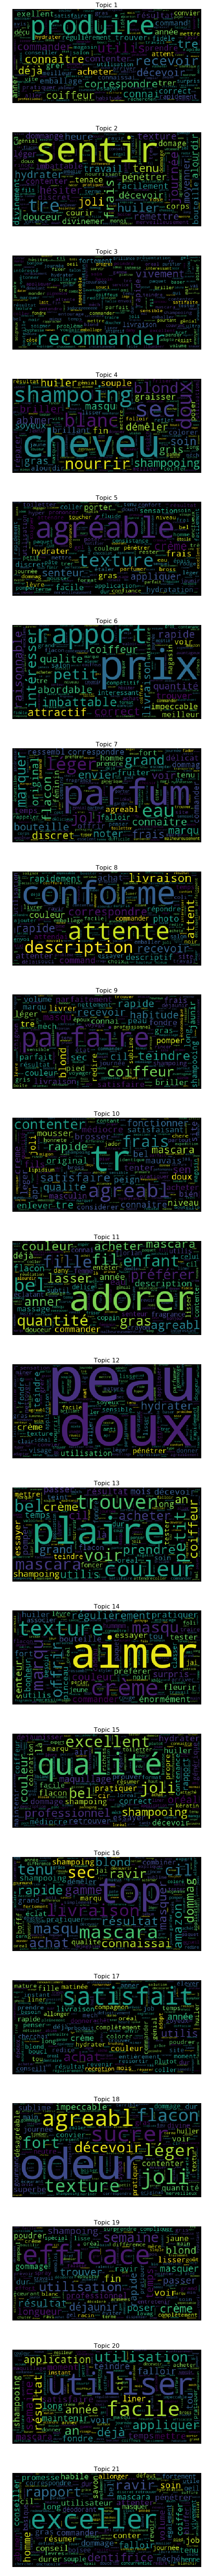

In [24]:
myarg = words_topic_list
wdc(*myarg)